Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.3.5     ✔ fma       2.4  
✔ forecast  8.18      ✔ expsmooth 2.3  

Warning message:
“package ‘forecast’ was built under R version 4.1.2”




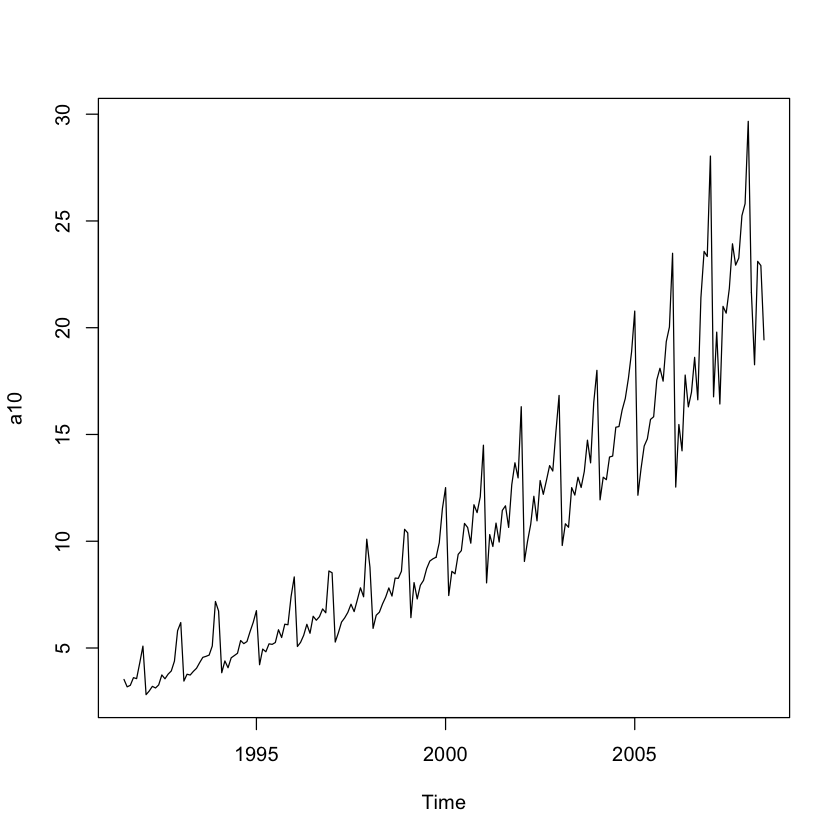

In [1]:
library(fpp2)
plot(a10)

## Graphics

In [2]:
#Set plot size
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }
set_plot_dimensions(12, 8)

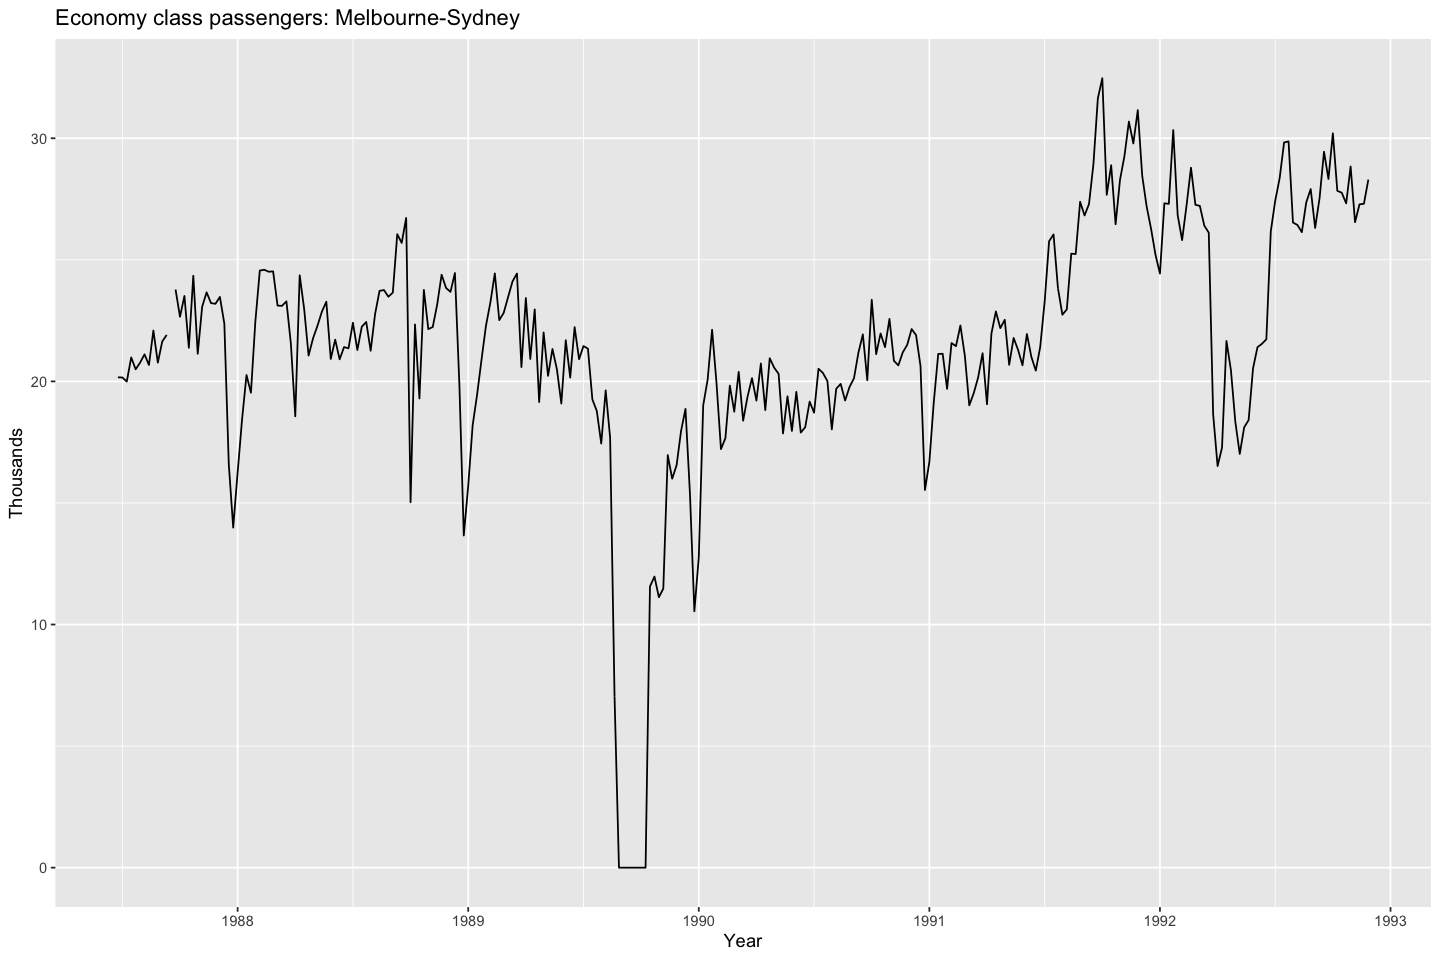

In [3]:
autoplot(melsyd[,"Economy.Class"]) +
ggtitle("Economy class passengers: Melbourne-Sydney") +
xlab("Year") +
ylab("Thousands")

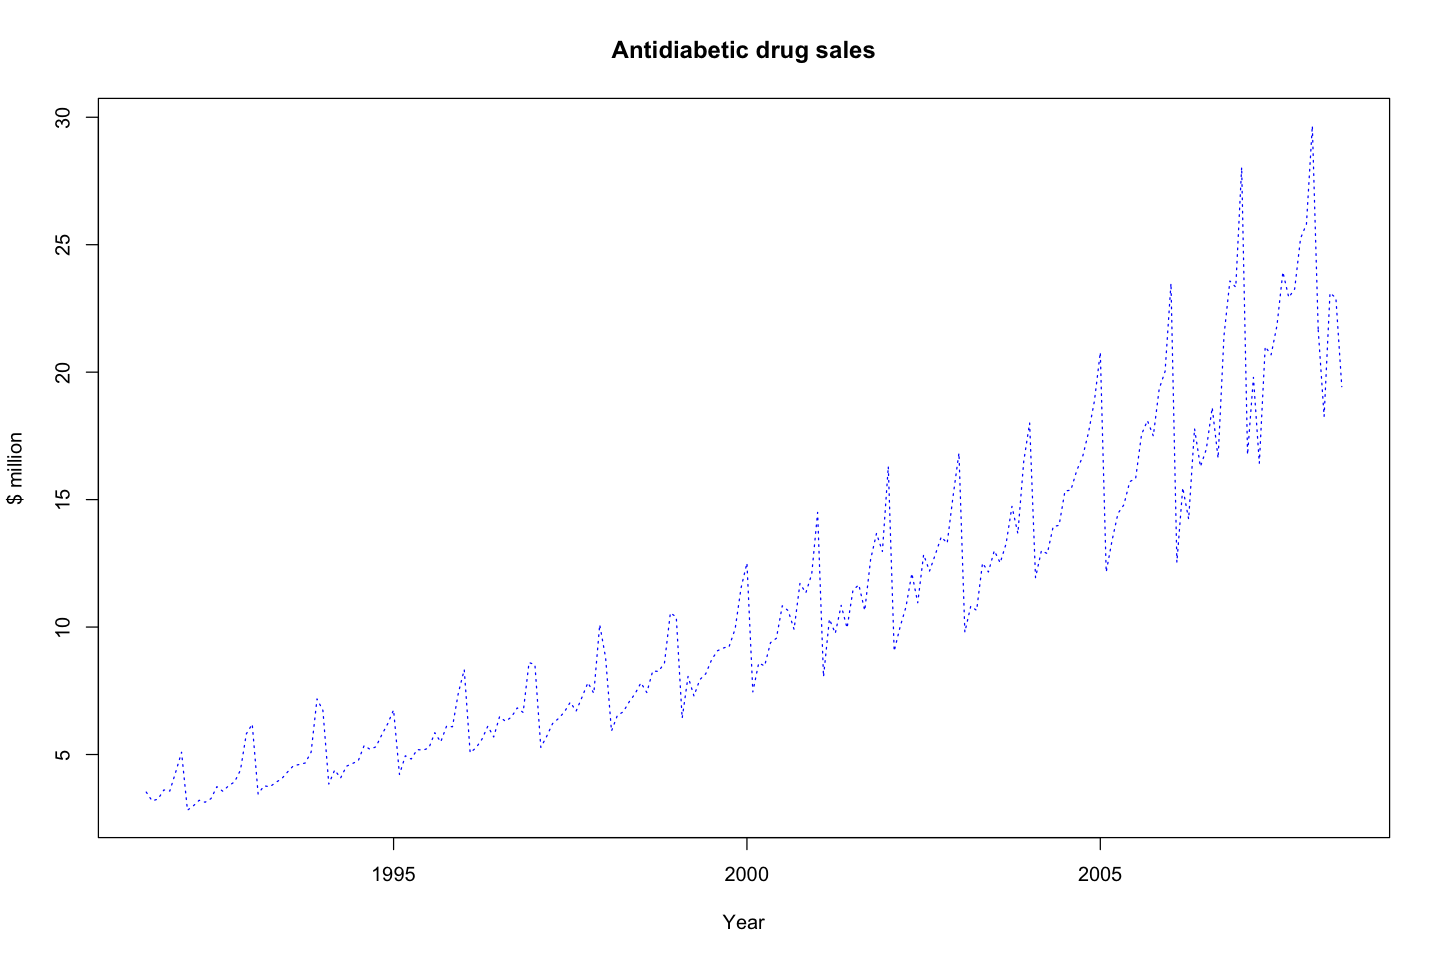

In [4]:
plot(a10, ylab="$ million", xlab="Year", main="Antidiabetic drug sales", col="blue", lty="dotted")

There is a clear and increasing trend. There is also a strong seasonal pattern that increases in size as the level of the series increases: the sudden drop at the end of each year is caused by a government subsidisation scheme that makes it cost-effective for patients to stockpile drugs at the end of the calendar year. 

The forecasts of this series would need to capture the seasonal pattern, and the fact that the trend is changing slowly.

## Seasonal Plots

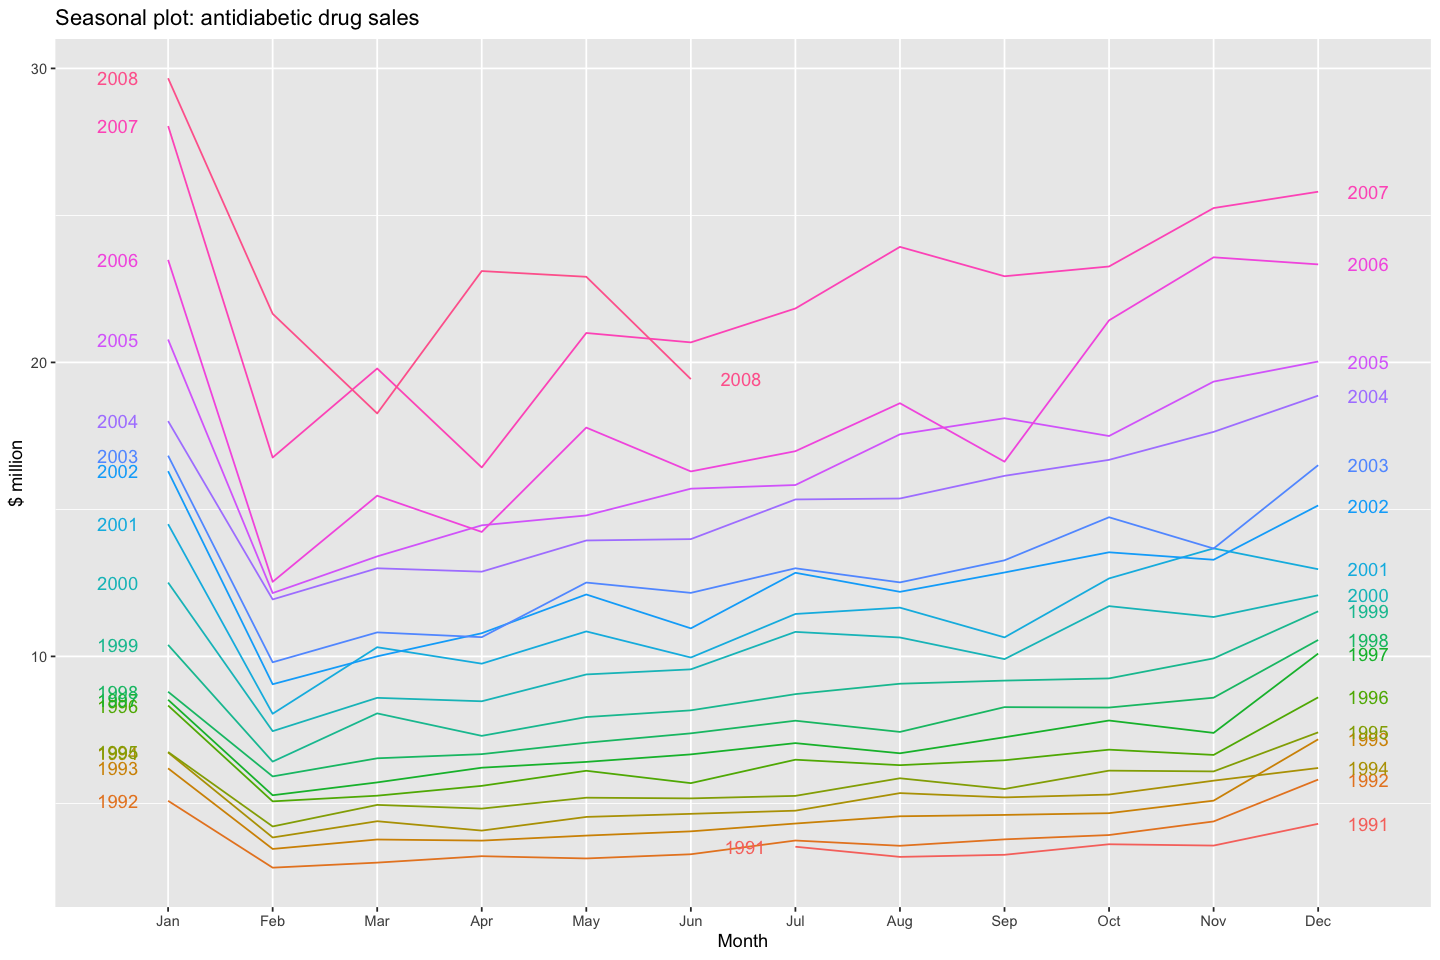

In [5]:
ggseasonplot(a10, year.labels=TRUE, year.labels.left=TRUE) +
ylab("$ million") +
ggtitle("Seasonal plot: antidiabetic drug sales")

It is clear that there is a large jump in sales in January each year. Actually, these are probably sales in late December as customers stockpile before the end of the calendar year, but the sales are not registered with the government until a week or two later.

### Circular axis - Polar Coordinates

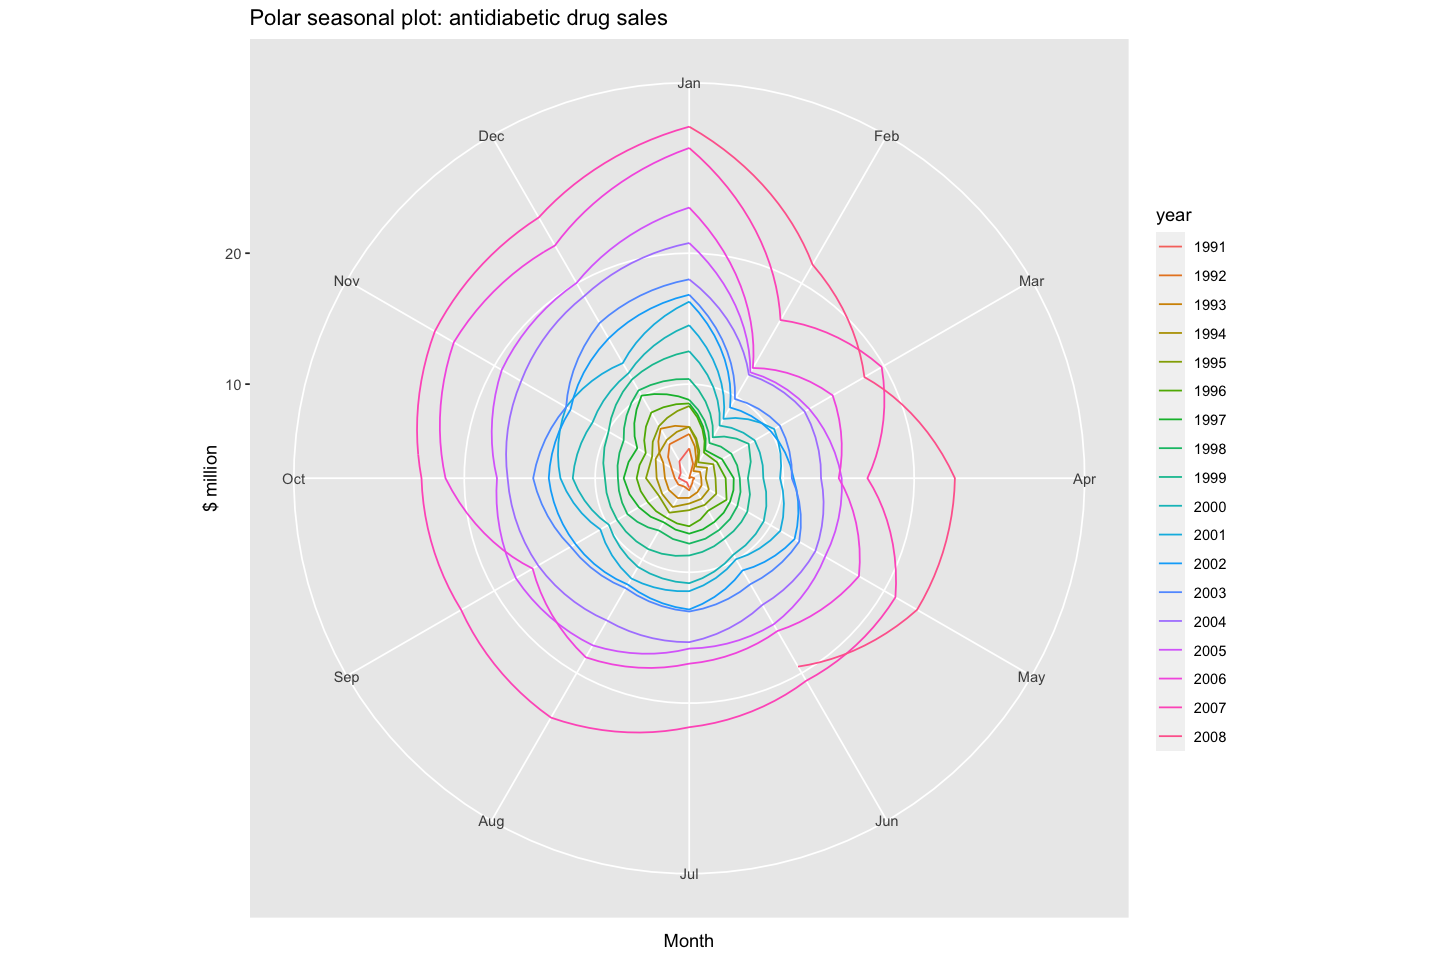

In [6]:
ggseasonplot(a10, polar=TRUE)+
ylab("$ million")+
ggtitle("Polar seasonal plot: antidiabetic drug sales")

### Separate Mini Time Plots - Subseries Plots

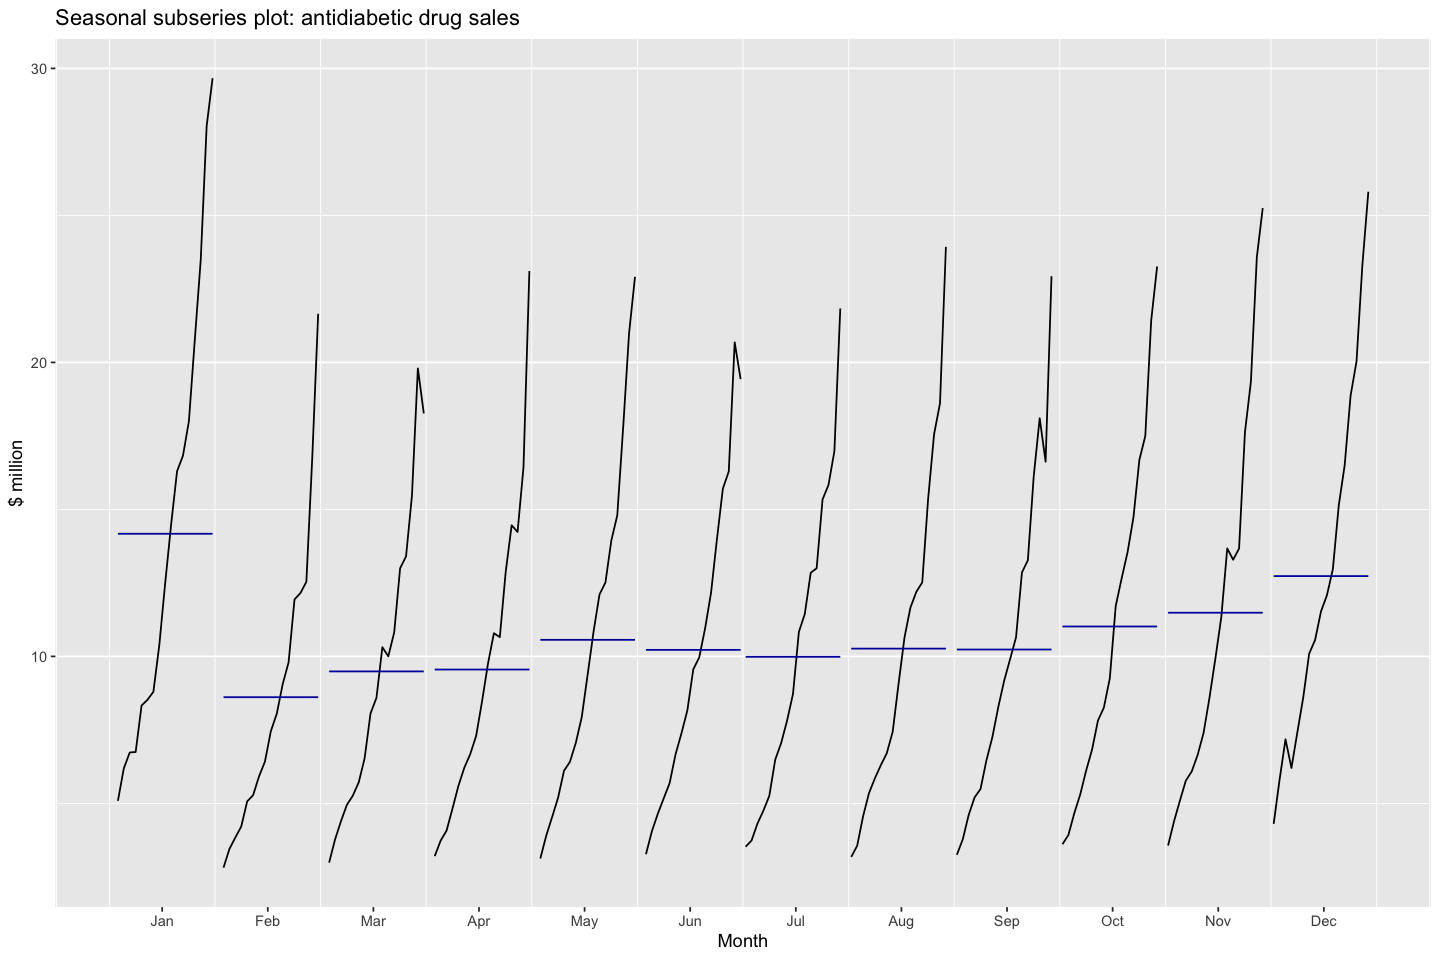

In [7]:
ggsubseriesplot(a10)+
ylab("$ million")+
ggtitle("Seasonal subseries plot: antidiabetic drug sales")

## Scatter Plots

Two time series: half-hourly electricity demand (in Gigawatts) and temperature (in degrees Celsius), for 2014 in Victoria, Australia. The temperatures are for Melbourne, the largest city in Victoria, while the demand values are for the entire state.

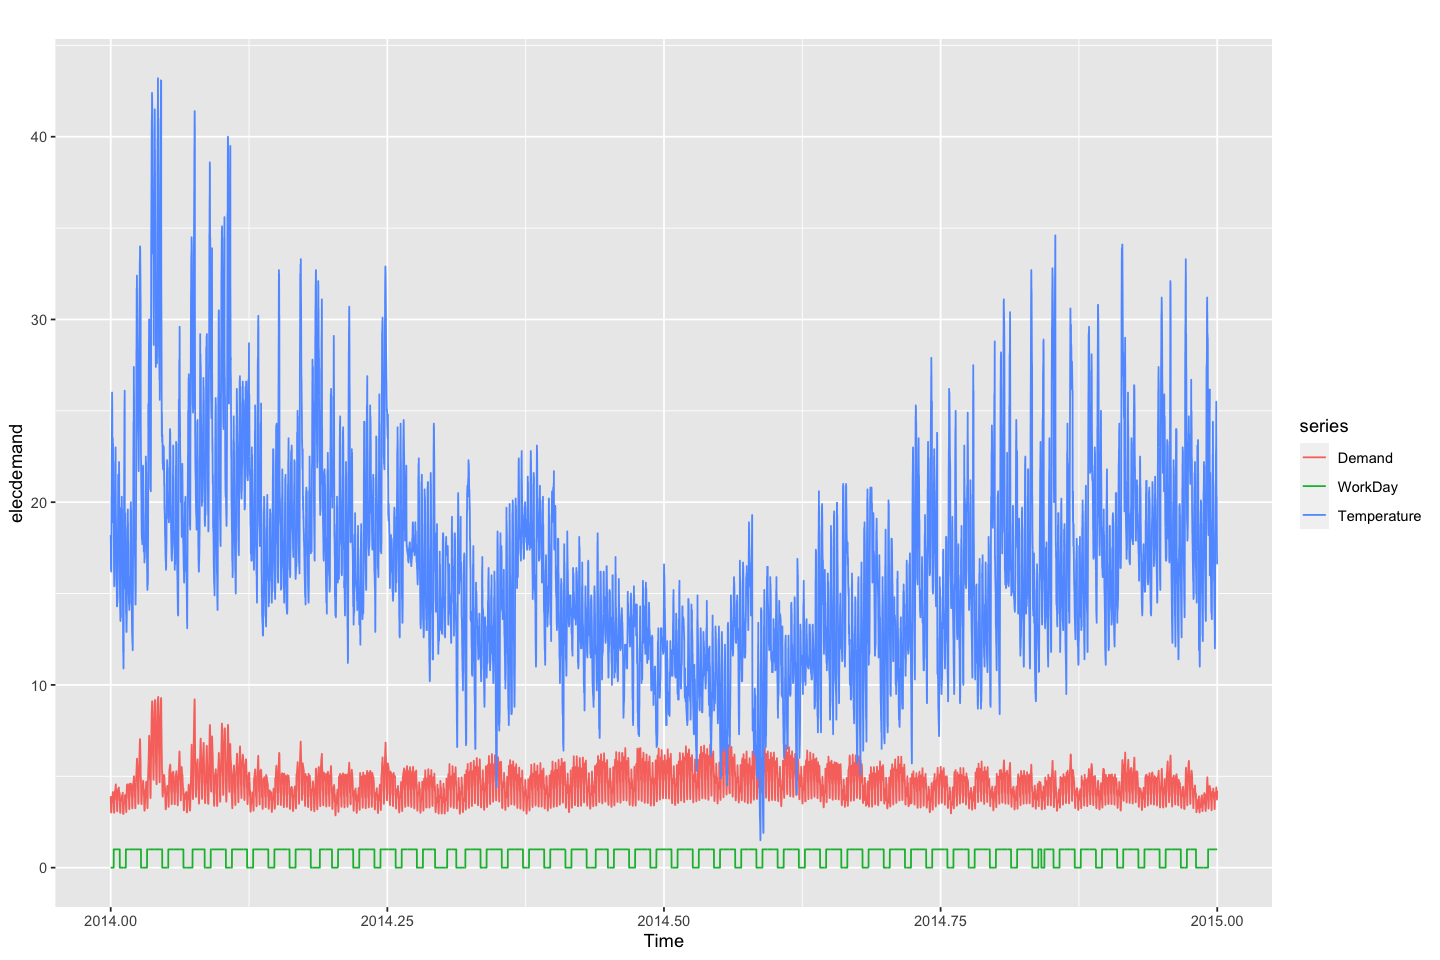

In [8]:
autoplot(elecdemand)

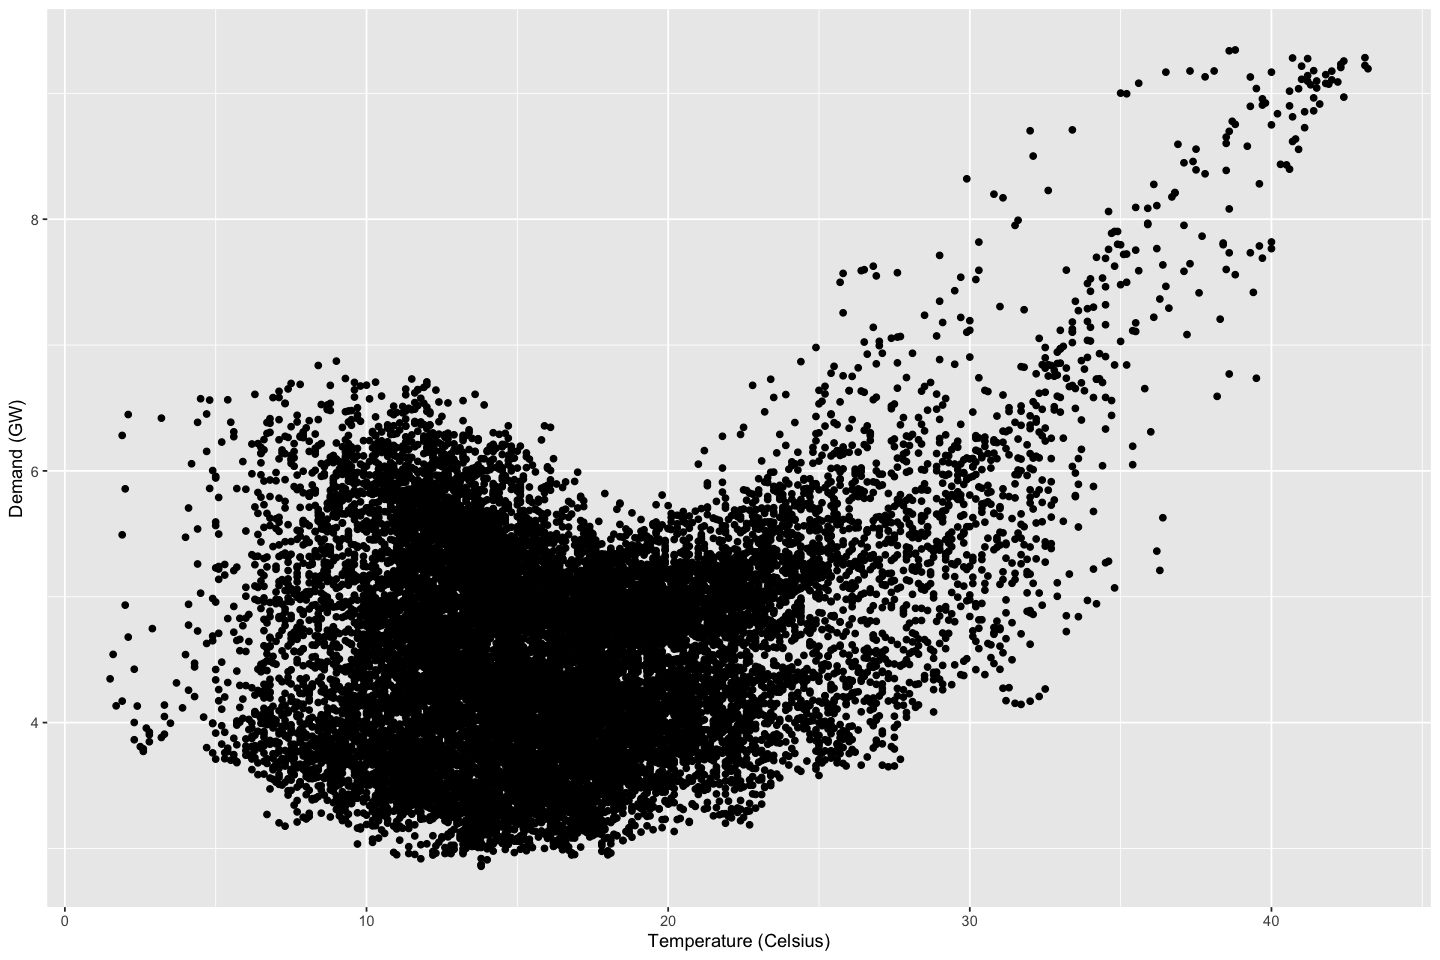

In [9]:
qplot(Temperature, Demand, data = as.data.frame(elecdemand))+
ylab("Demand (GW)")+
xlab("Temperature (Celsius)")

### Scatterplot matrices

Plot each variable against each other variable

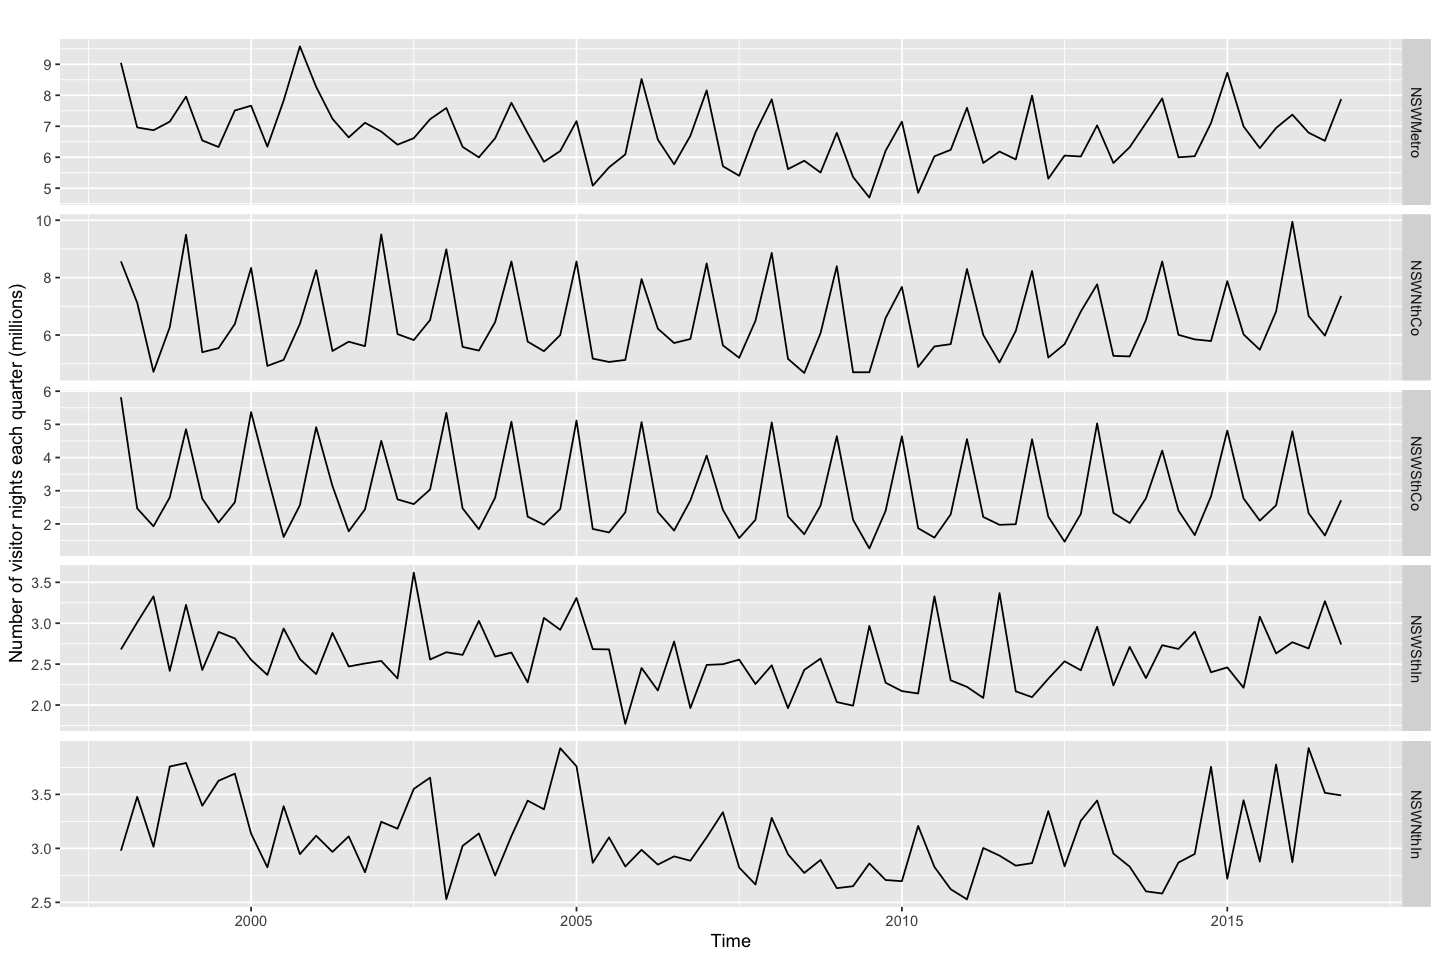

In [10]:
autoplot(visnights[,1:5], facets=TRUE) +
ylab("Number of visitor nights each quarter (millions)")

plot each time series against the others

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



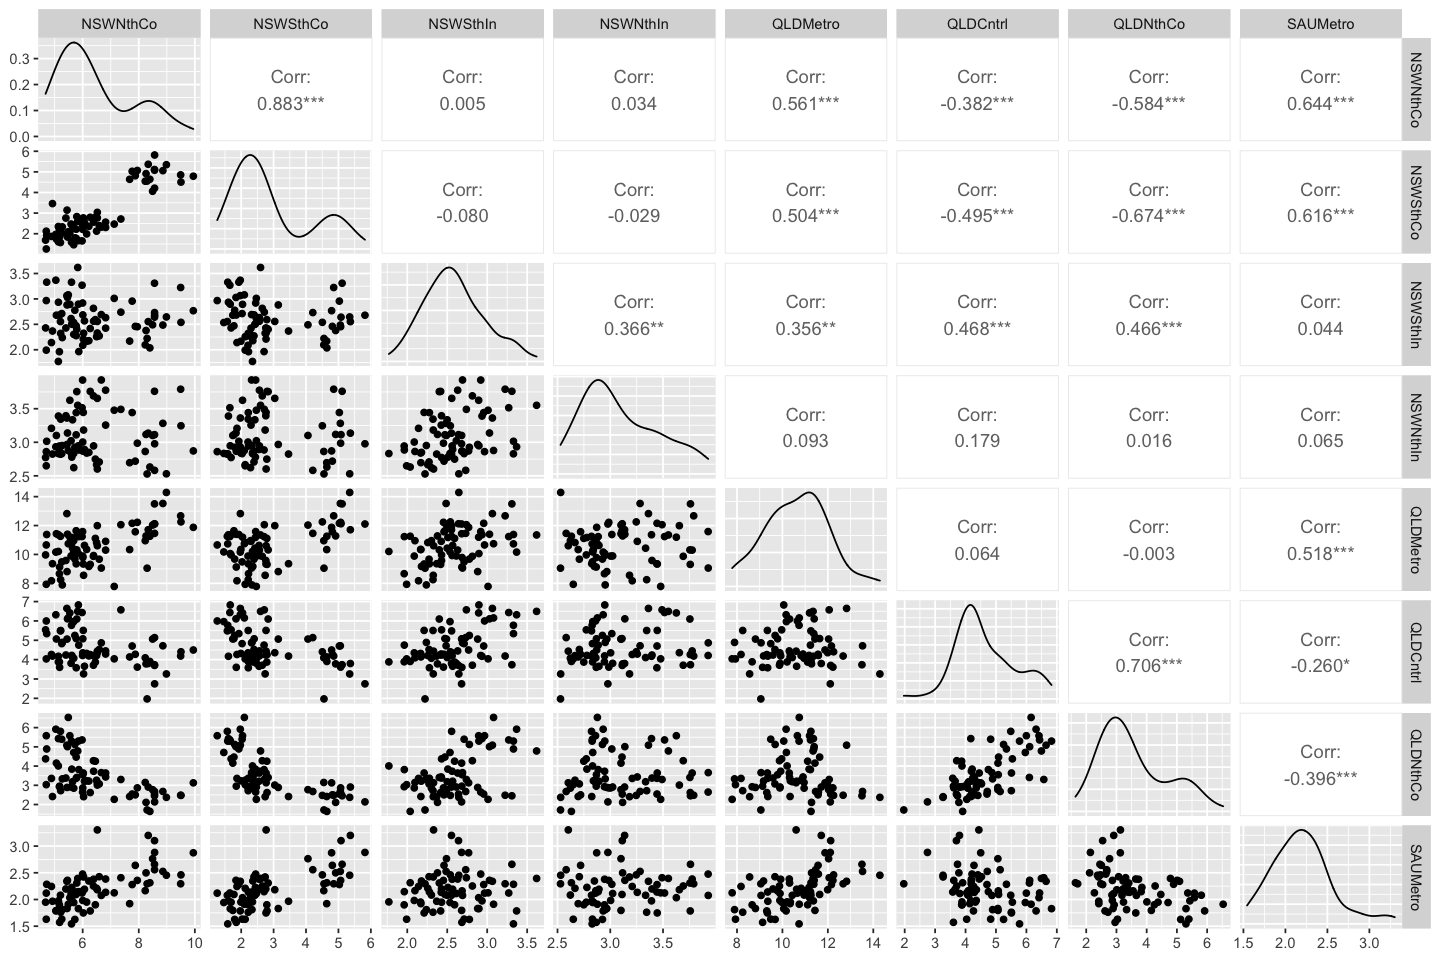

In [11]:
GGally::ggpairs(as.data.frame(visnights[,2:9]))

## Autocorrelation

Calculated for different lags

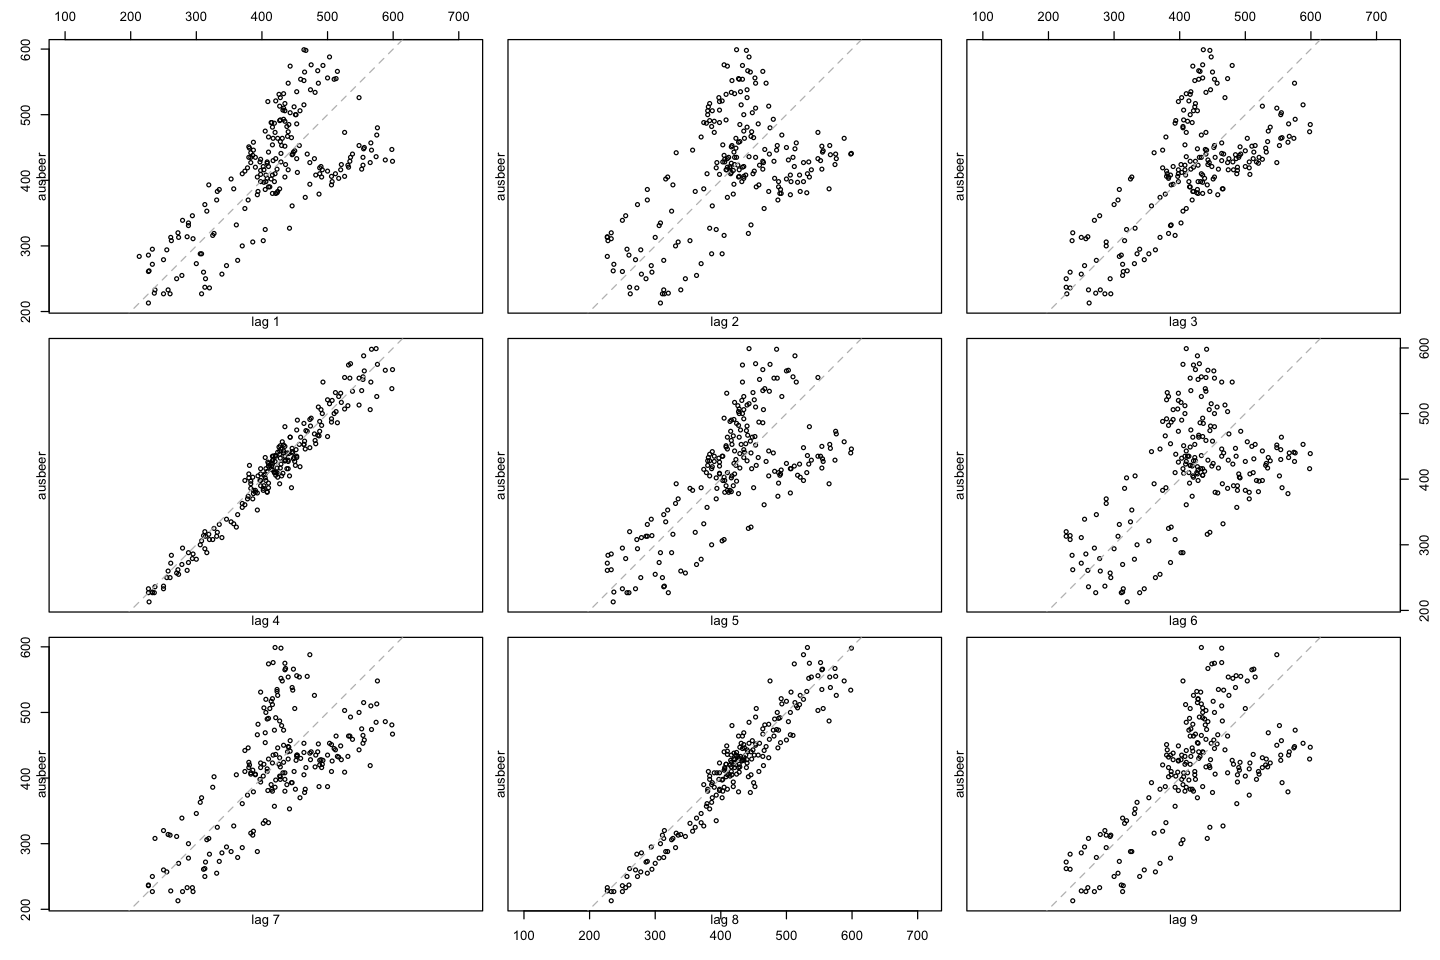

In [12]:
lag.plot(ausbeer, lags=9, do.lines=FALSE)

The autocorrelation coefficients are normally plotted to form the autocorrelation function or ACF. The plot is also known as a **correlogram**

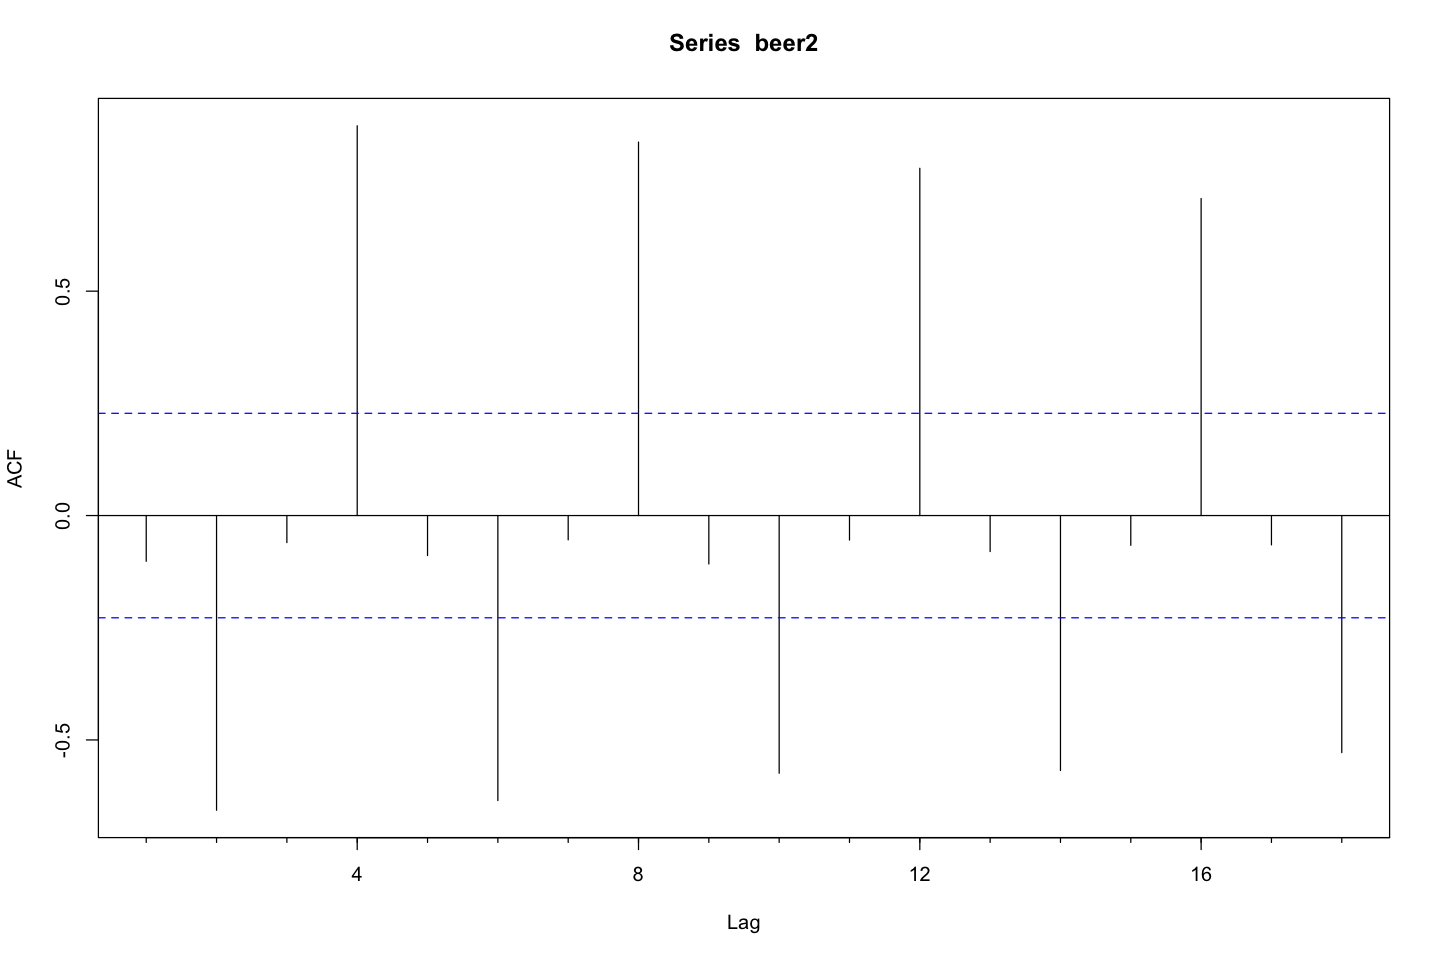

In [13]:
beer2 <- window(ausbeer, start=1992) 
Acf(beer2)

r4 is higher than for the other lags. This is due to the seasonal pattern in the data: the peaks tend to be four quarters apart and the throughs tend to be two quarters apart.

For a white noise series (time series with no authocorrelation), we expect 95%of the spikes in the ACF to lie within ±2/ $\sqrt{T}$ where T is the length of the time series. It is common to plot these bounds on a graph of the ACF.

It indicates the level of significance of autocorrelation. In this example, T=50 and so the bounds are at ±0.28. All autocorrelation coefficients lie within these limits, confirming that the data are white noise.

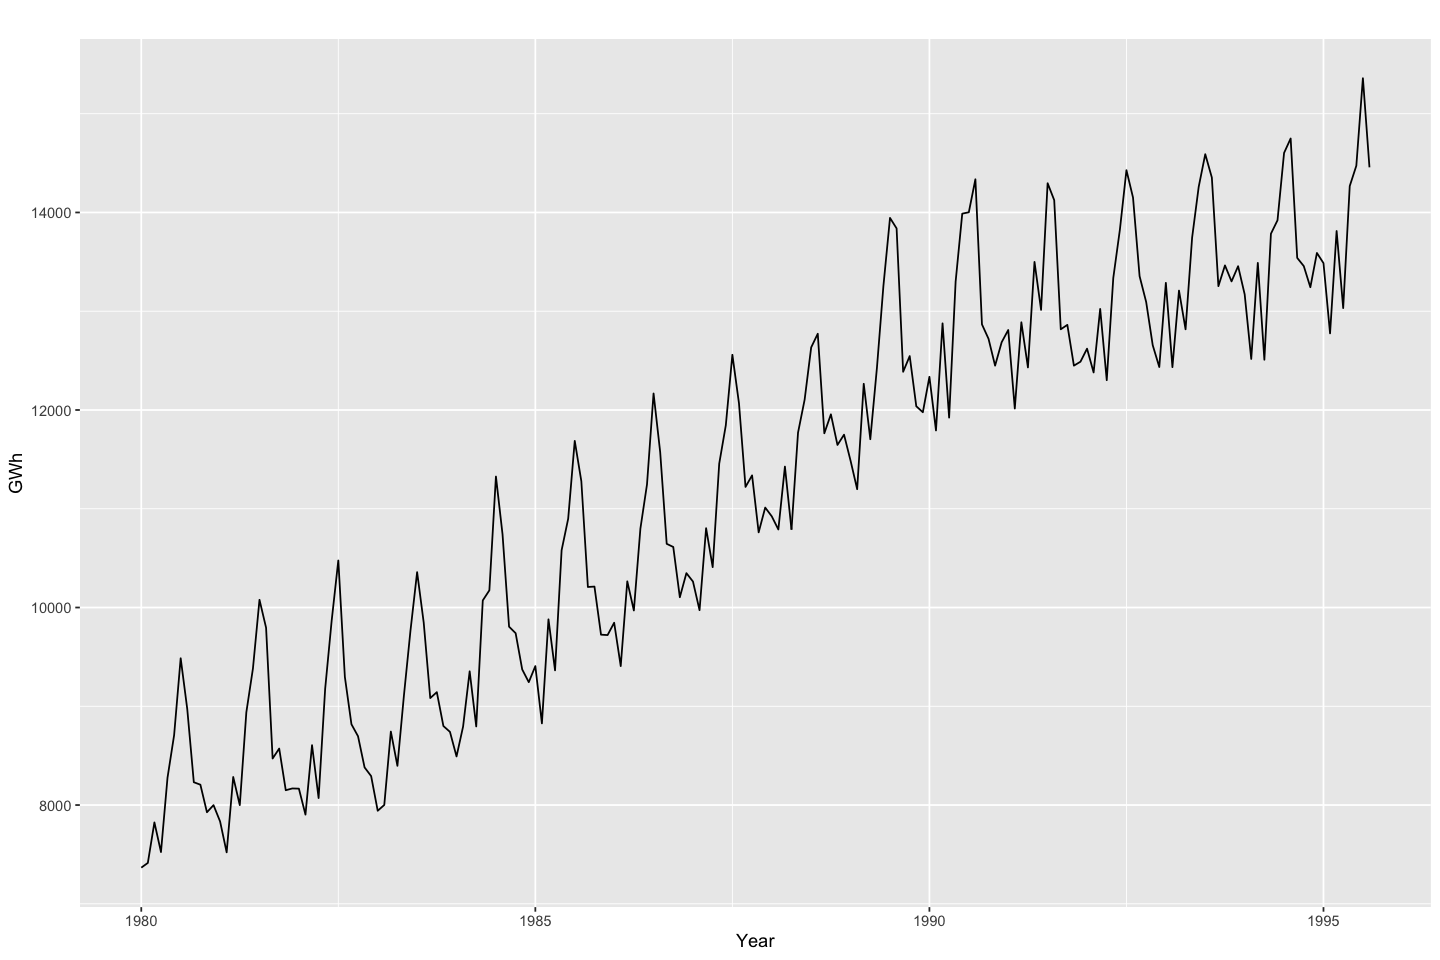

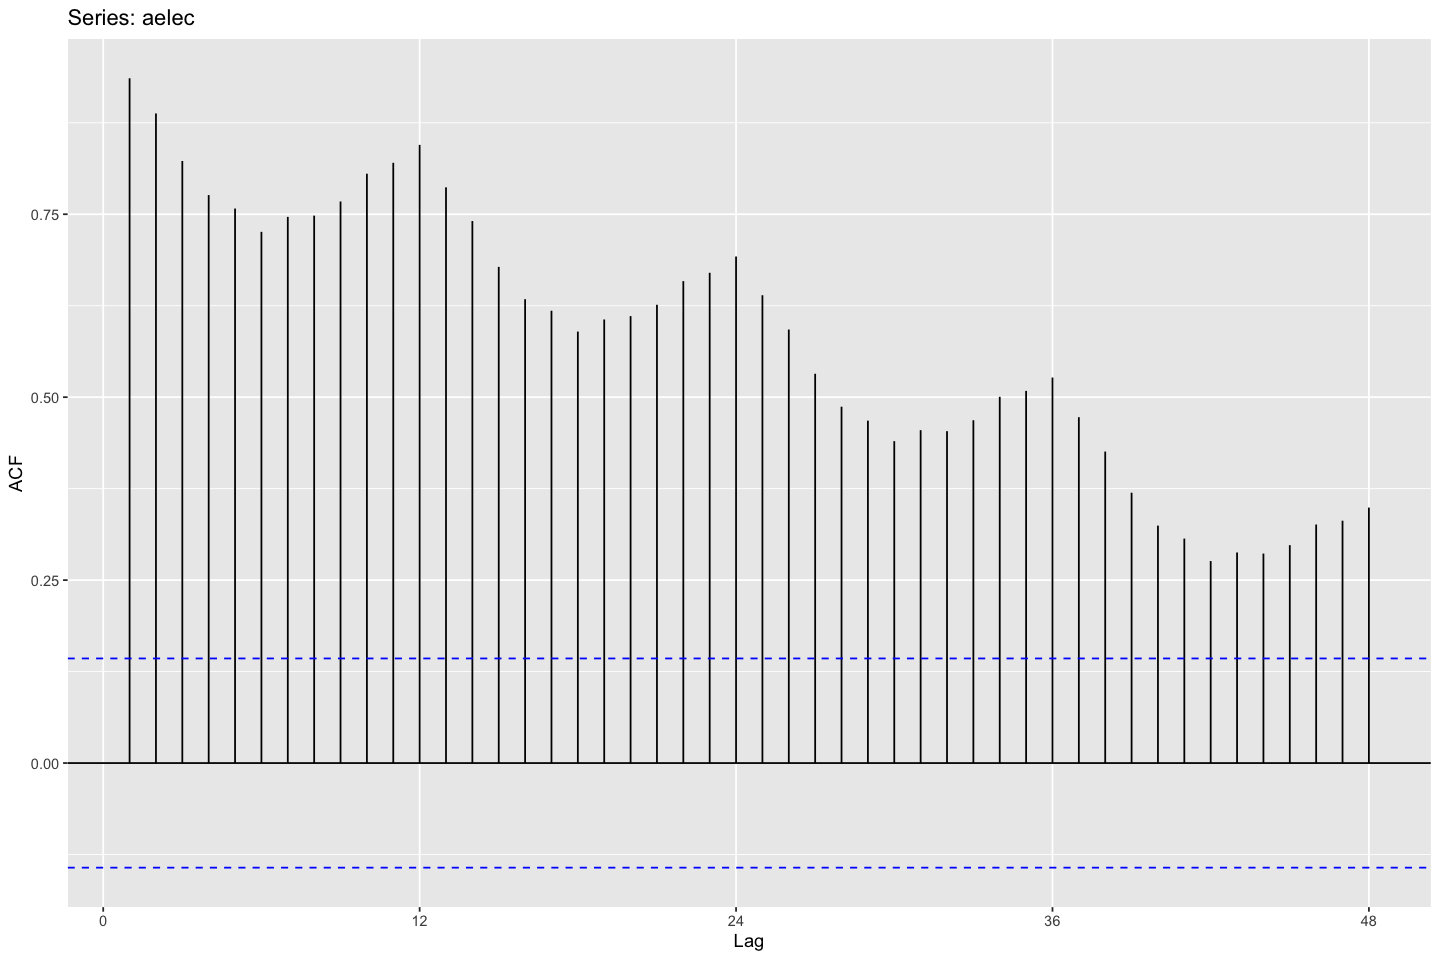

In [14]:
aelec <- window(elec, start=1980)
autoplot(aelec) + xlab("Year") + ylab("GWh")
ggAcf(aelec, lag=48)

### White Noise

Time series that show no autocorrelation are called "white noise".

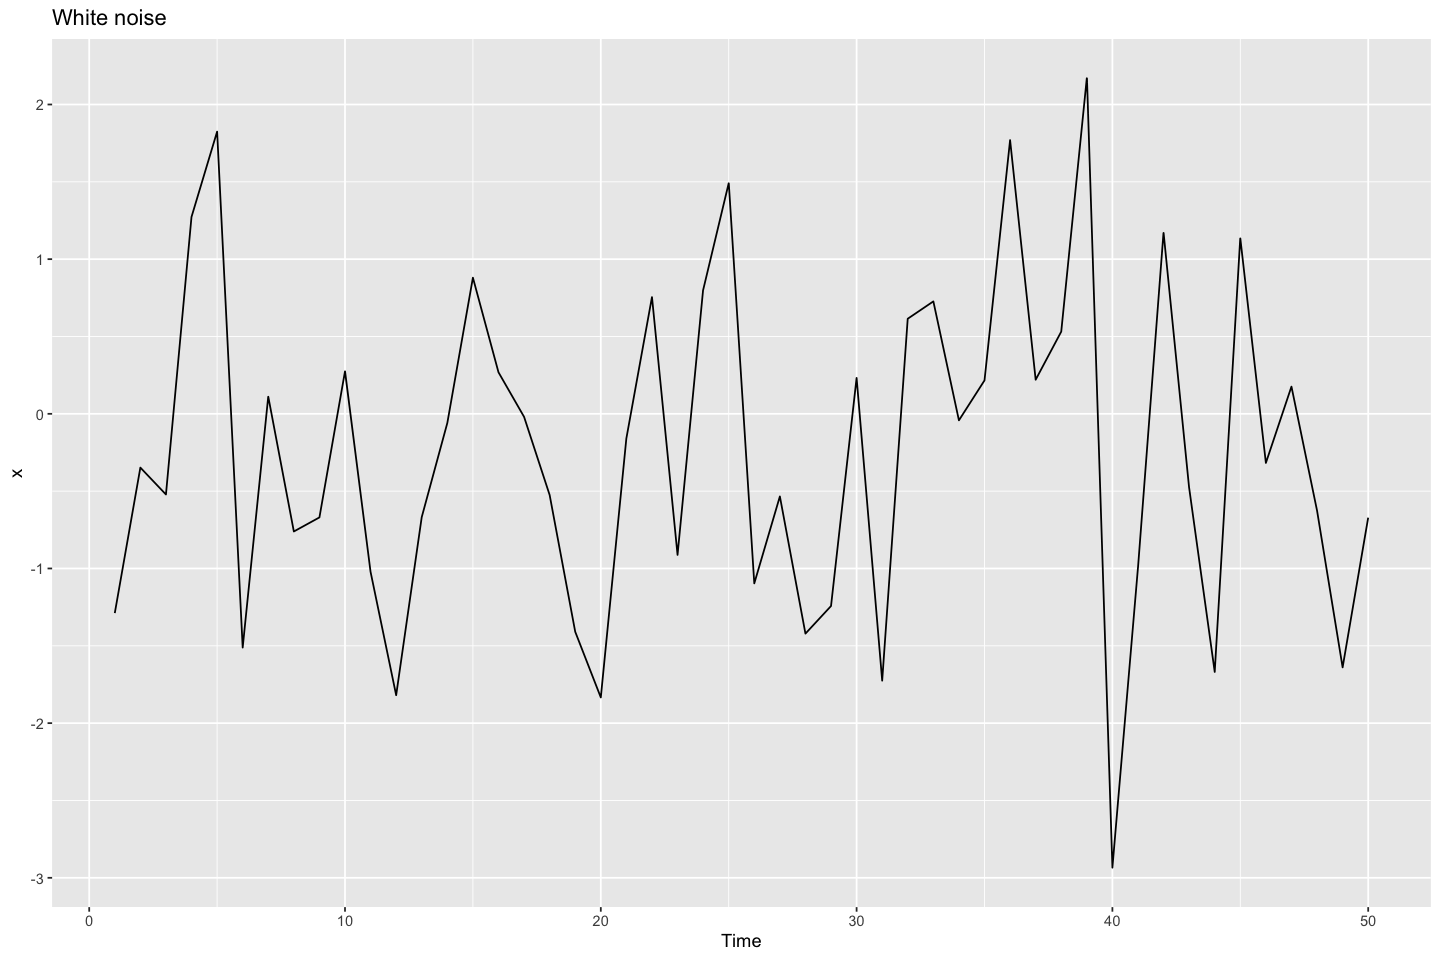

In [15]:
set.seed(30)
x <- ts(rnorm(50))
autoplot(x) + ggtitle("White noise")

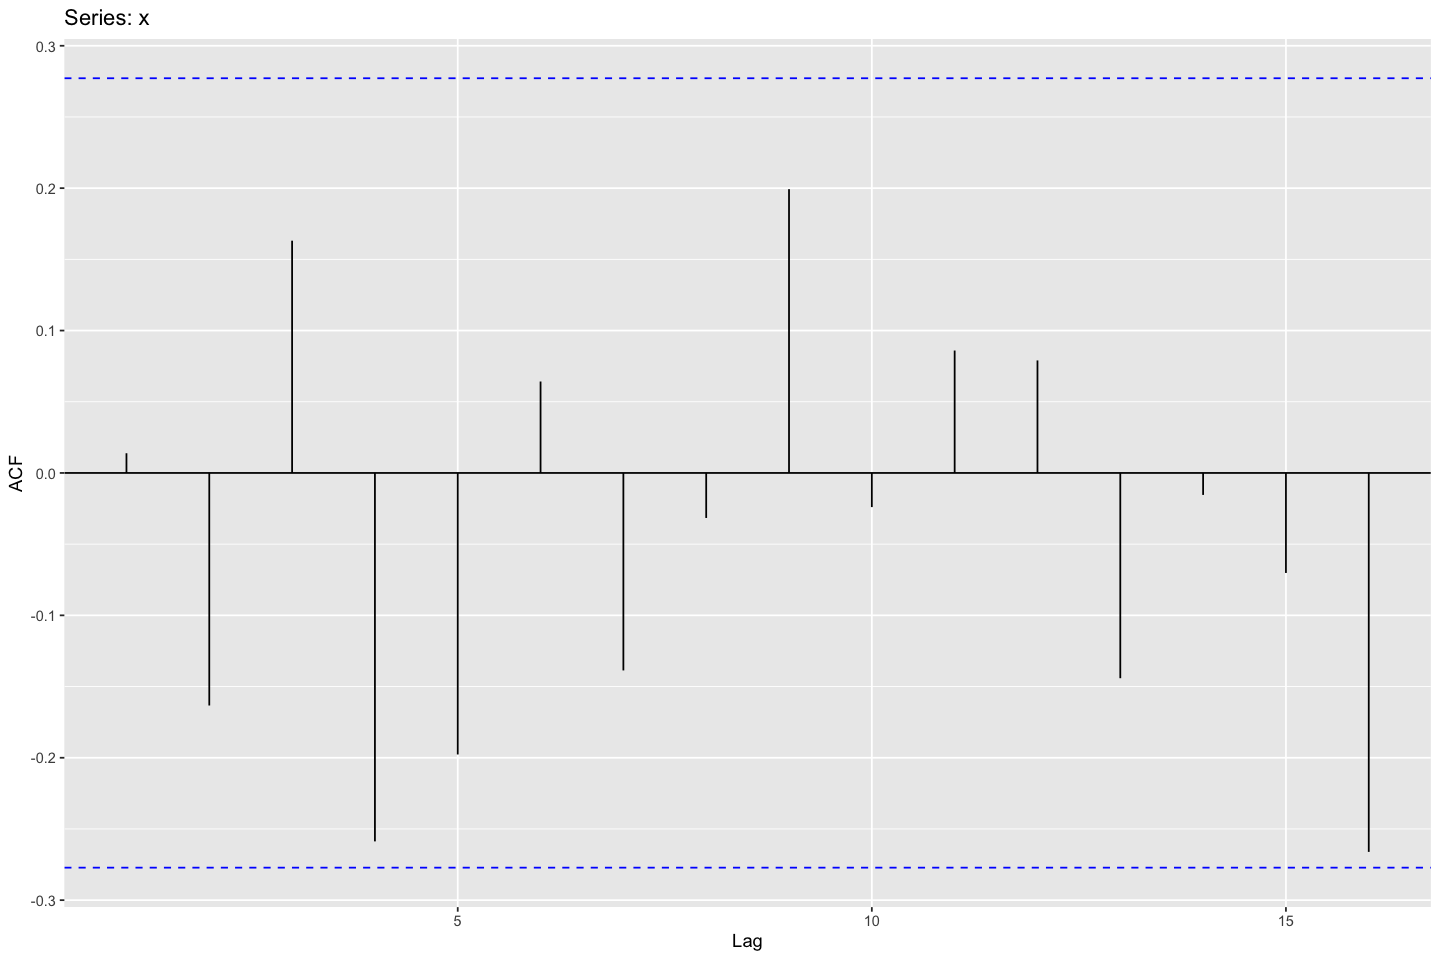

In [16]:
ggAcf(x)

In this example, T=50 and so the bounds are at ±2/$\sqrt{50}$=±0.28. All autocorrelation coefficients lie within these limits, confirming that the data are white noise.

## Case1: Beer Production

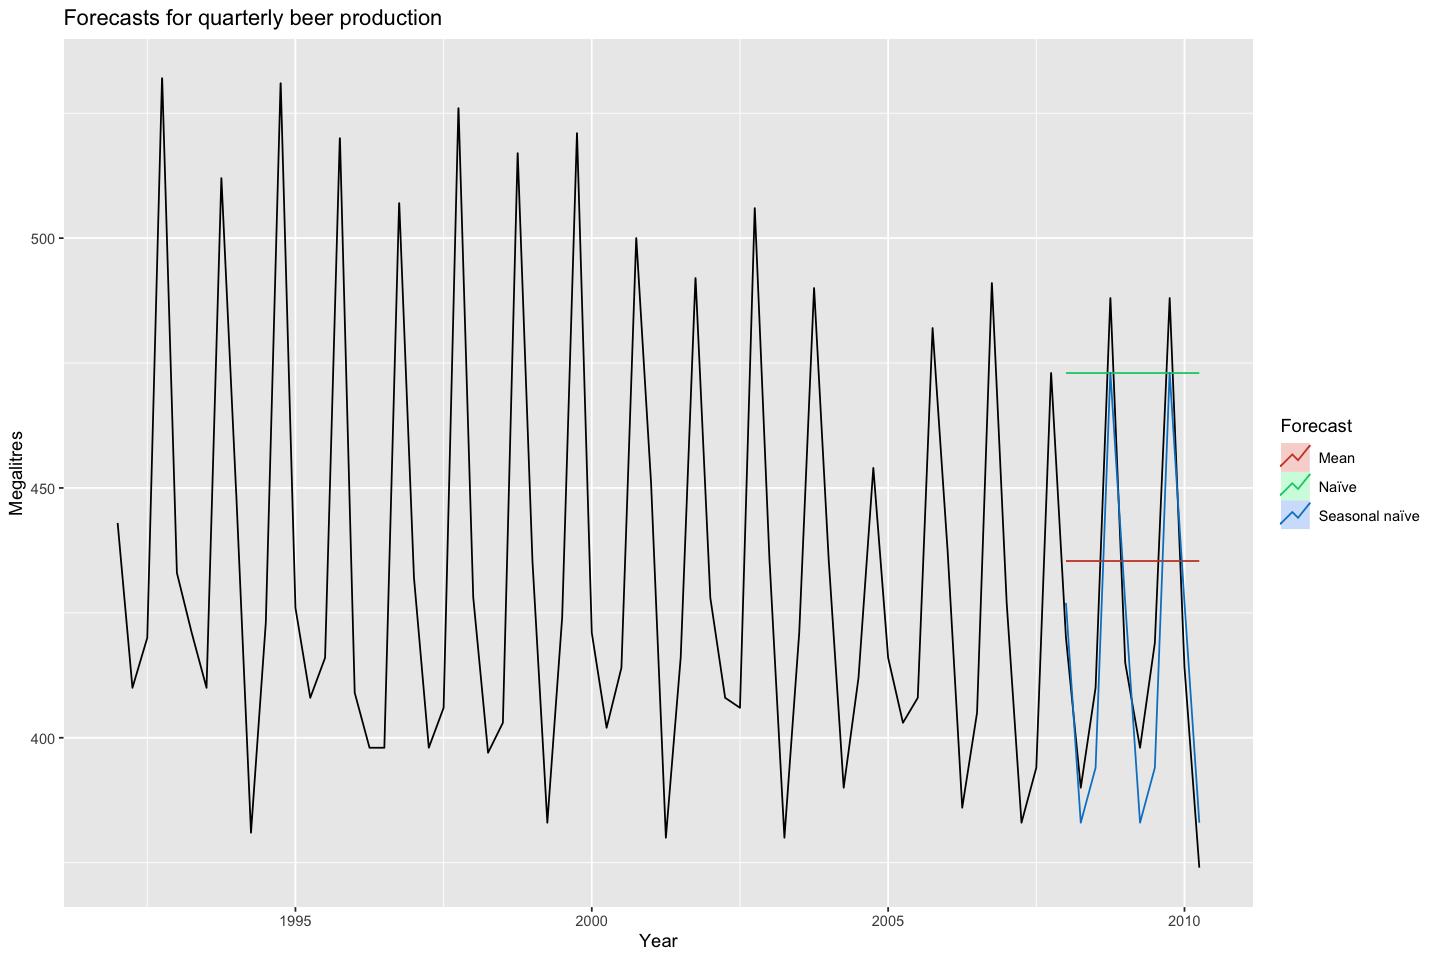

In [30]:
# Set training data from 1992 to 2007
beer2 <- window(ausbeer,start=1992,end=c(2007,4))

beerfit1 <- meanf(beer2,h=10)
beerfit2 <- rwf(beer2,h=10)
beerfit3 <- snaive(beer2,h=10)
# Plot some forecasts
autoplot(window(ausbeer, start=1992)) +
autolayer(beerfit1, series="Mean", PI=FALSE) +
autolayer(beerfit2, series="Naïve", PI=FALSE) +
autolayer(beerfit3, series="Seasonal naïve", PI=FALSE) +
ggtitle("Forecasts for quarterly beer production") +
xlab("Year") + ylab("Megalitres") +
guides(colour=guide_legend(title="Forecast"))

#### Model Evaluating

In [31]:
beer3 <- window(ausbeer, start=2006) 
accuracy(beerfit1, beer3)

ME      RMSE     MAE      MPE        MAPE     MASE     ACF1       
Training set   0.000 43.62858 35.23438 -0.9365102 7.886776 2.463942 -0.10915105
Test set     -13.775 38.44724 34.82500 -3.9698659 8.283390 2.435315 -0.06905715
             Theil's U
Training set       NA 
Test set     0.801254

In [32]:
accuracy(beerfit2, beer3)

ME          RMSE     MAE      MPE         MAPE     MASE    
Training set   0.4761905 65.31511 54.73016  -0.9162496 12.16415 3.827284
Test set     -51.4000000 62.69290 57.40000 -12.9549160 14.18442 4.013986
             ACF1        Theil's U
Training set -0.24098292       NA 
Test set     -0.06905715 1.254009

In [33]:
accuracy(beerfit3, beer3)

ME        RMSE     MAE  MPE        MAPE     MASE      ACF1      
Training set -2.133333 16.78193 14.3 -0.5537713 3.313685 1.0000000 -0.2876333
Test set      5.200000 14.31084 13.4  1.1475536 3.168503 0.9370629  0.1318407
             Theil's U
Training set       NA 
Test set     0.298728

## Case 2: Google Stock

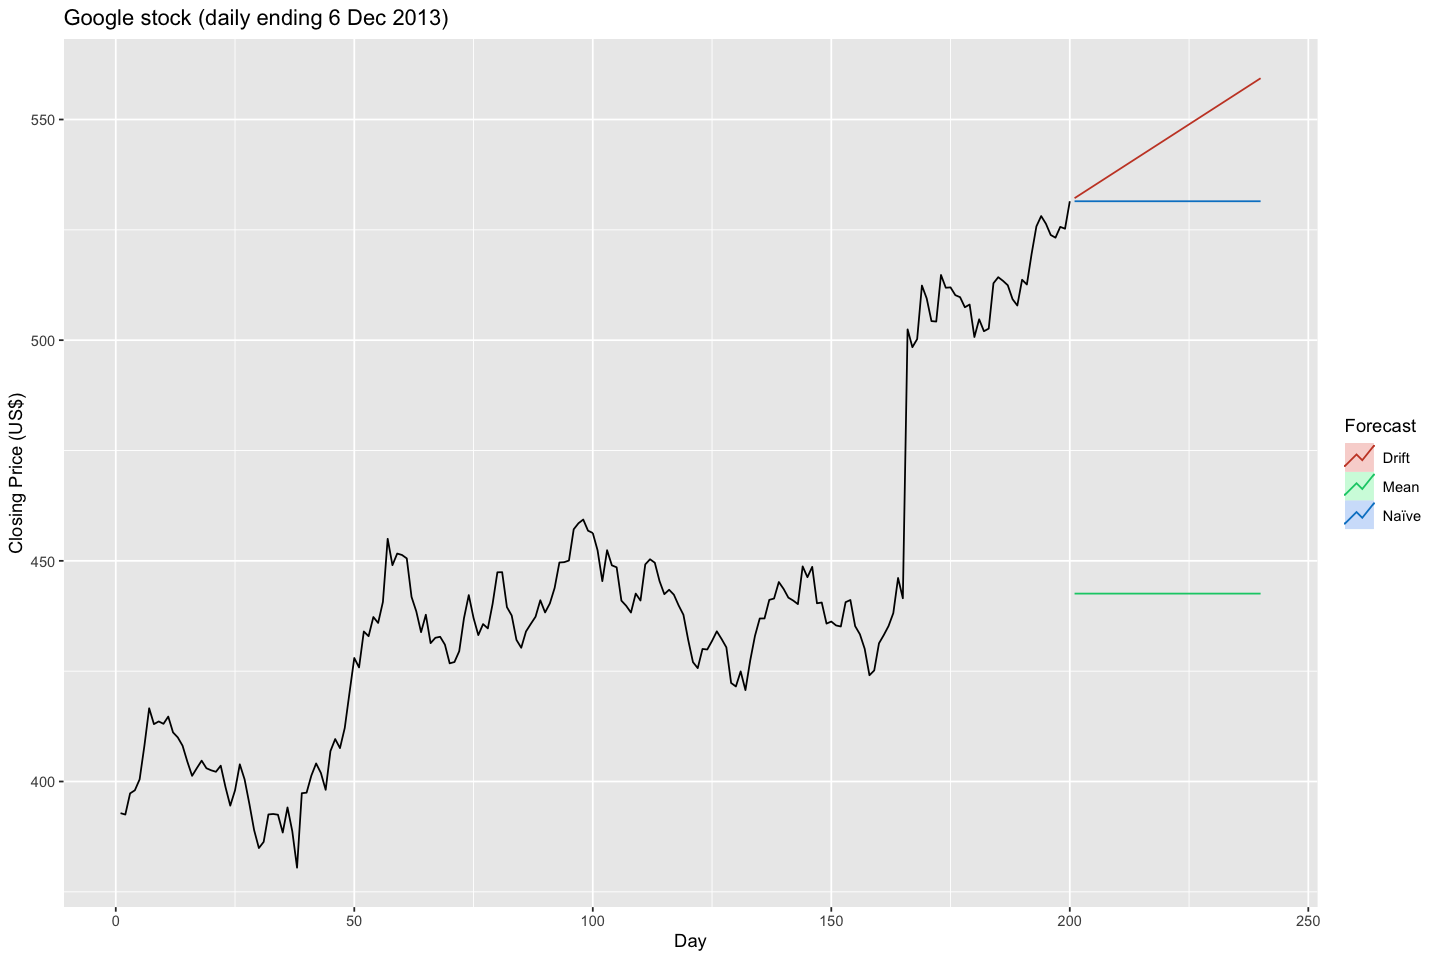

In [22]:
autoplot(goog200) + 
autolayer(meanf(goog200, h=40),
series="Mean", PI=FALSE) + 
autolayer(rwf(goog200, h=40),
series="Naïve", PI=FALSE) + 
autolayer(rwf(goog200, drift=TRUE, h=40),
series="Drift", PI=FALSE) +
ggtitle("Google stock (daily ending 6 Dec 2013)") + 
xlab("Day") + ylab("Closing Price (US$)") + 
guides(colour=guide_legend(title="Forecast"))

## Case 3: Dow Jone Index

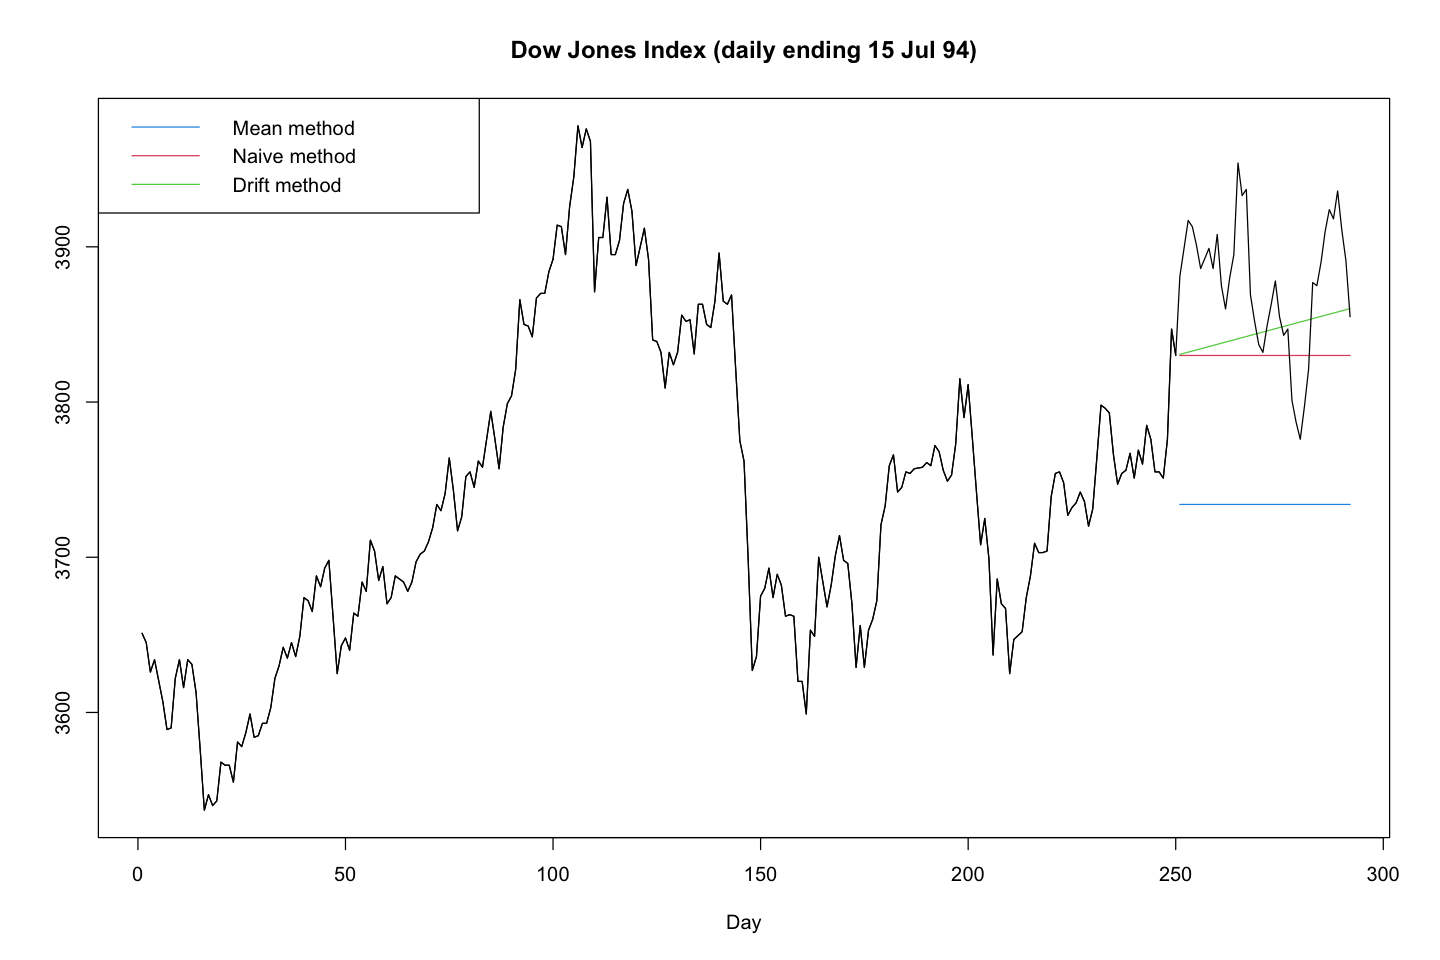

In [35]:
dj2<-window(dj,end=250)
plot(dj2,main="Dow Jones Index (daily ending 15 Jul 94)", ylab="",xlab="Day",xlim=c(2,290))
lines(meanf(dj2,h=42)$mean,col=4)
lines(rwf(dj2,h=42)$mean,col=2)
lines(rwf(dj2,drift=TRUE,h=42)$mean,col=3)
legend("topleft",lty=1,col=c(4,2,3),legend=c("Mean method","Naive method","Drift method"))
lines(dj)

#### Model Evaluating

In [36]:
dj3 <- window(dj, start=251)
accuracy(meanf(dj2,h=42), dj3)

ME           RMSE      MAE       MPE         MAPE     MASE    
Training set 6.553874e-14  98.71439  80.56688 -0.06934572 2.151962 4.920567
Test set     1.424185e+02 148.23574 142.41848  3.66304611 3.663046 8.698111
             ACF1      Theil's U
Training set 0.9719593       NA 
Test set     0.8255136 6.072223

In [37]:
accuracy(rwf(dj2, h=42), dj3)

ME         RMSE     MAE      MPE        MAPE      MASE    
Training set  0.7188755 22.00014 16.37349 0.01749683 0.4380973 1.000000
Test set     46.4404762 62.02846 54.44048 1.18683463 1.3979371 3.324915
             ACF1       Theil's U
Training set 0.02446257      NA  
Test set     0.82551365 2.54582

In [38]:
accuracy(rwf(dj2,drift=TRUE,h=42), dj3)

ME           RMSE     MAE      MPE          MAPE      MASE     
Training set 1.278395e-13 21.98839 16.34525 -0.001766862 0.4373707 0.9982752
Test set     3.098465e+01 53.69767 45.72743  0.787547945 1.1757748 2.7927719
             ACF1       Theil's U
Training set 0.02446257       NA 
Test set     0.83881869 2.203742

#### Residuals

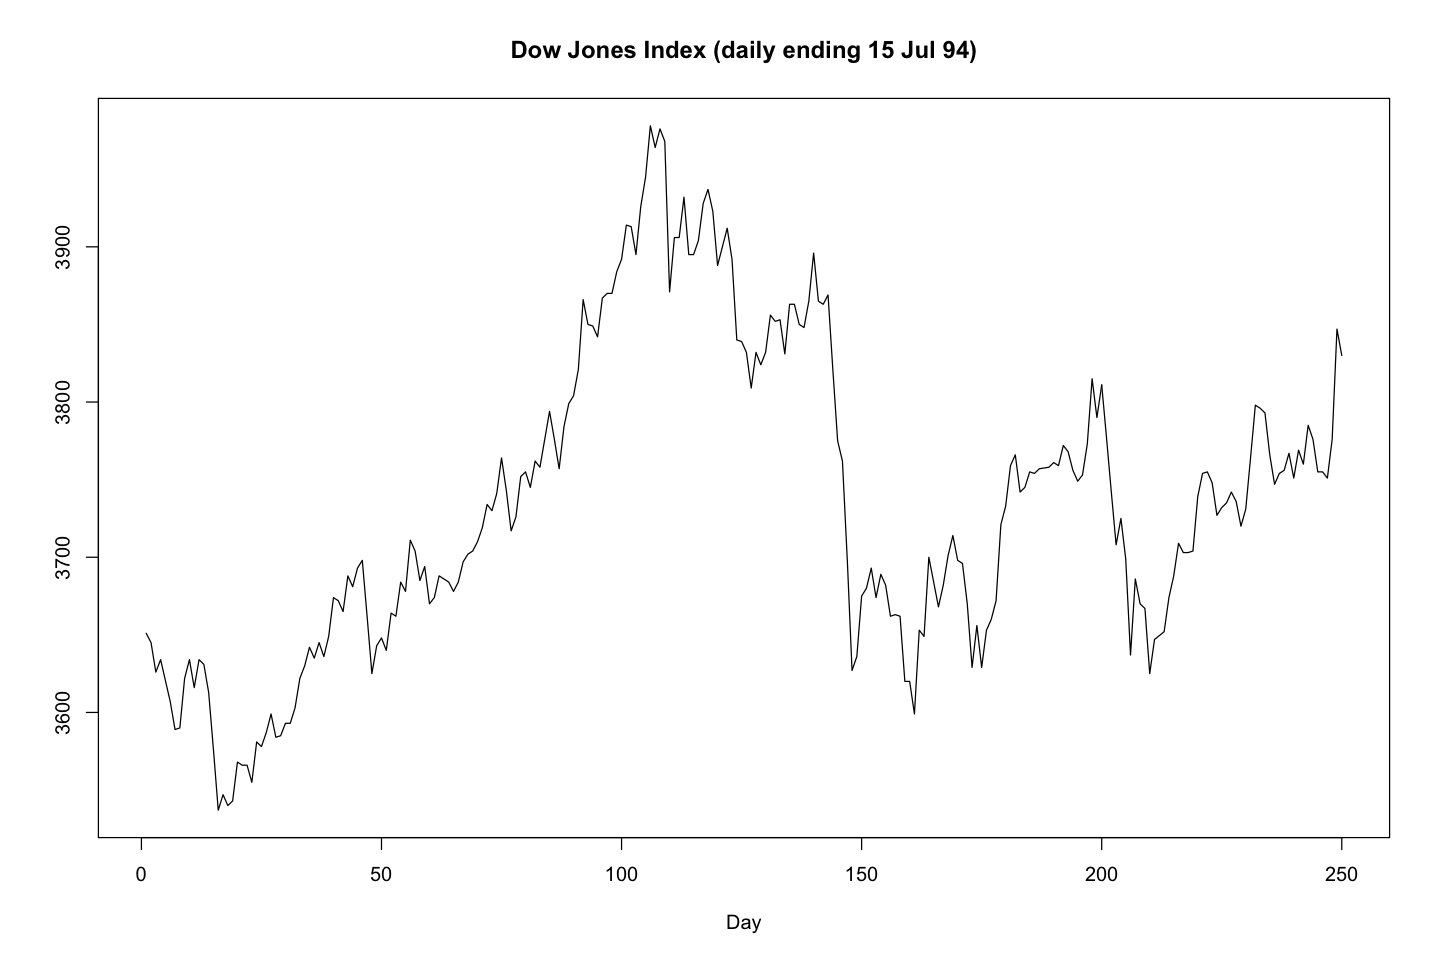

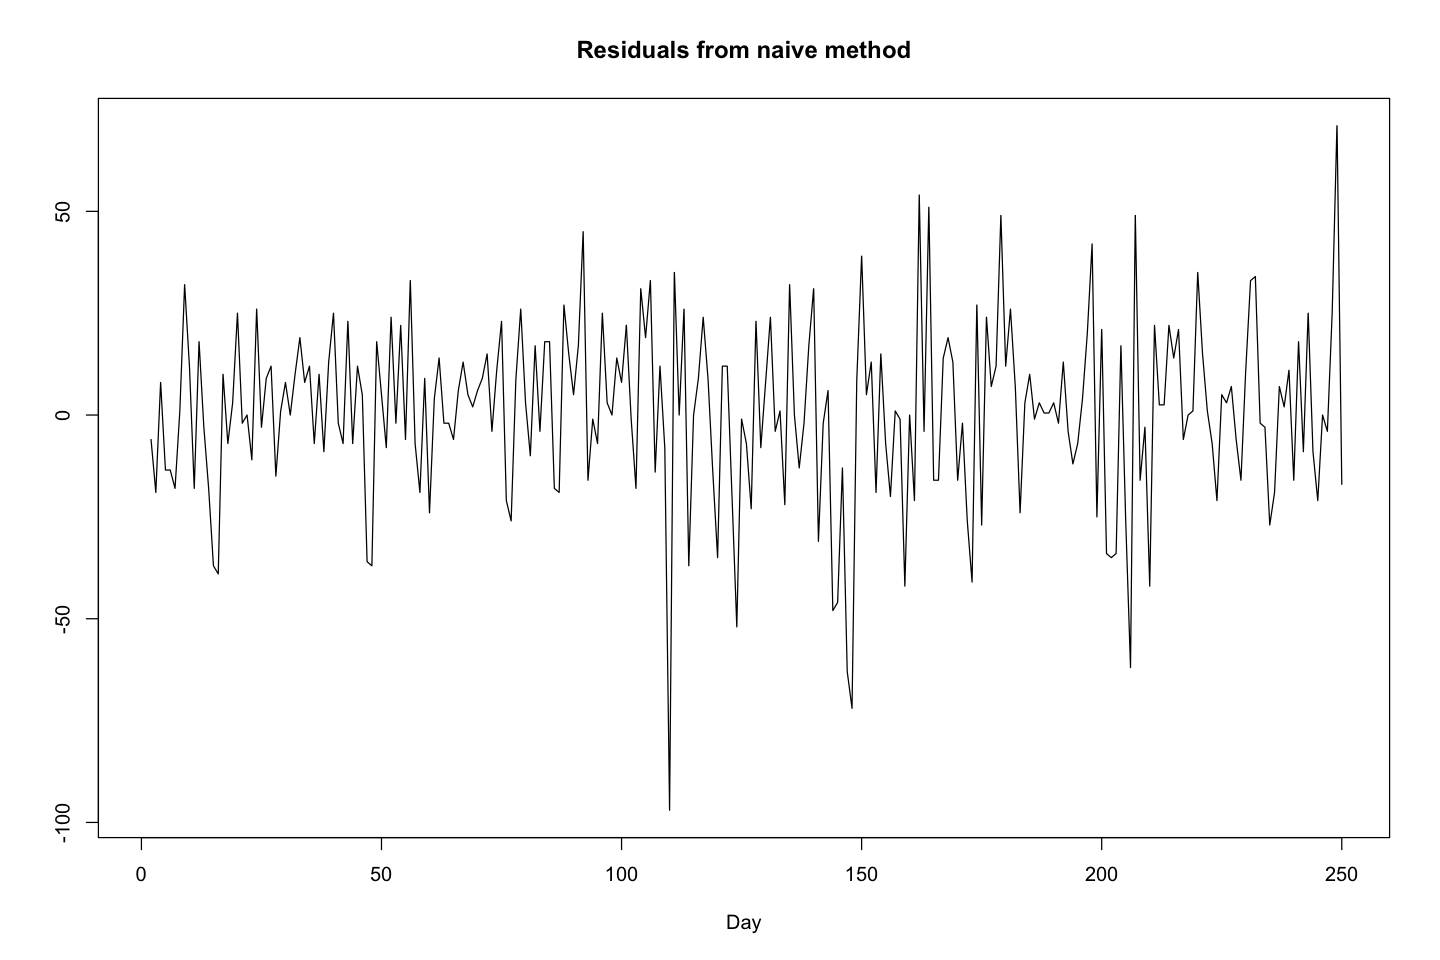

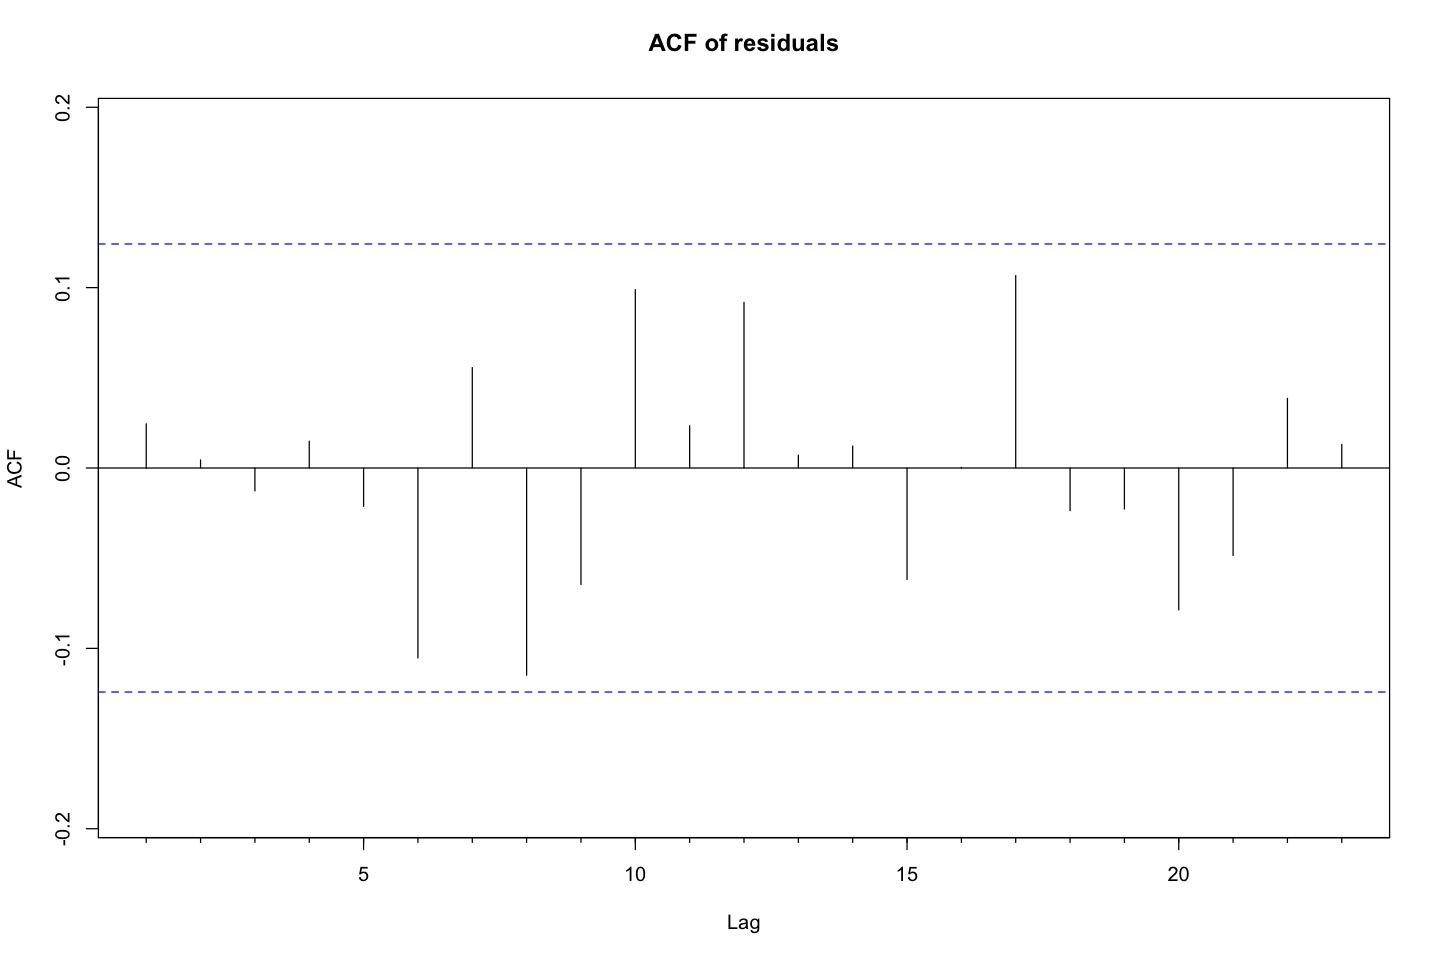

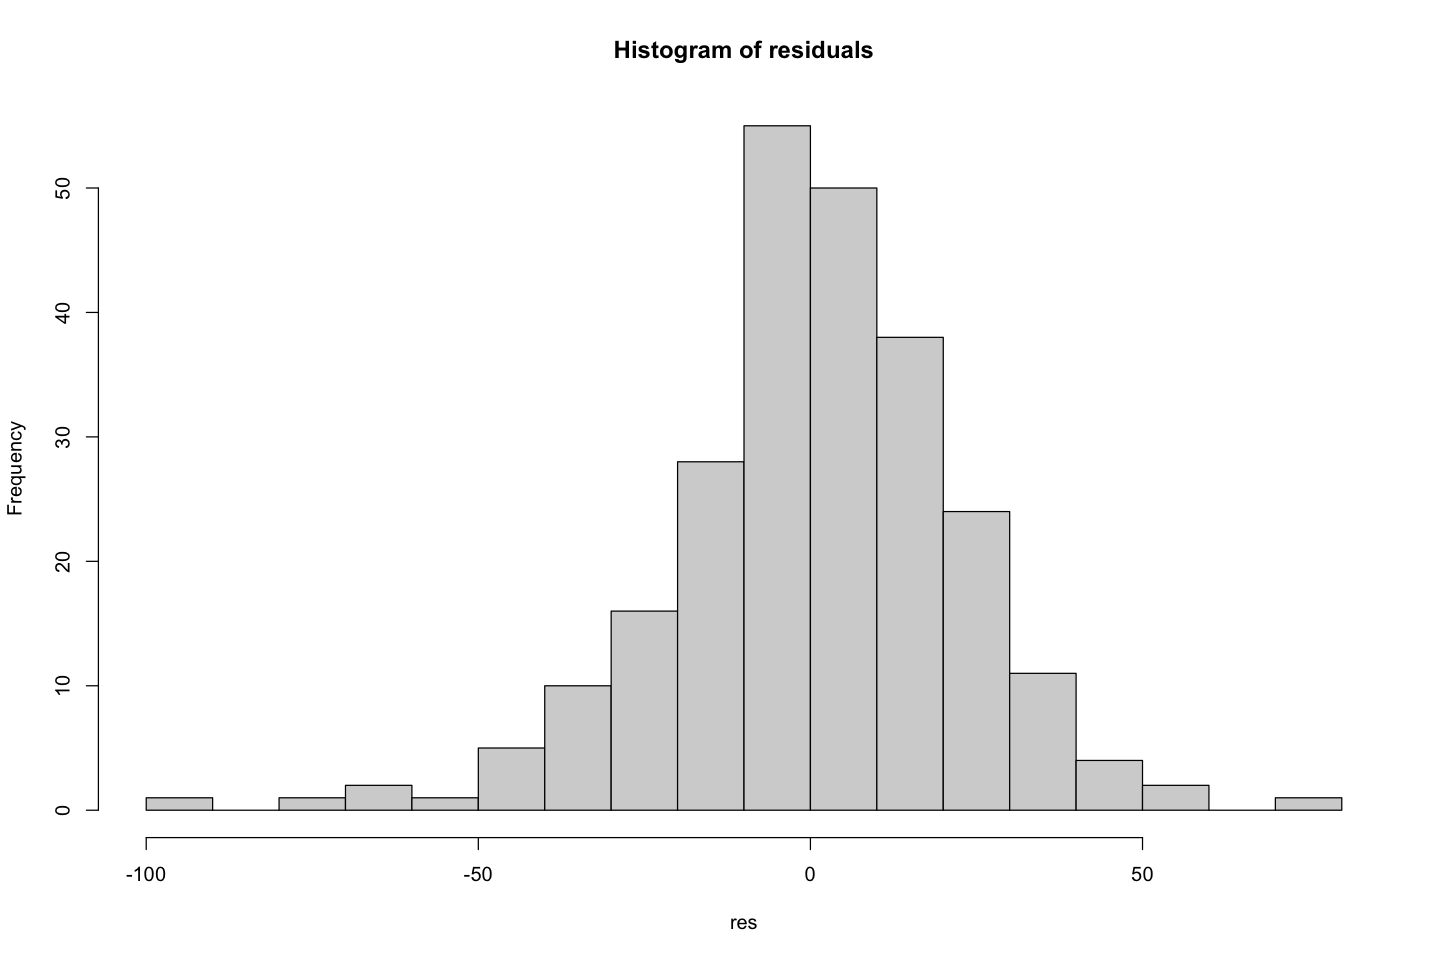

In [47]:
dj2 <- window(dj, end=250)
plot(dj2, main="Dow Jones Index (daily ending 15 Jul 94)", ylab="", xlab="Day")
res <- residuals(naive(dj2))
plot(res, main="Residuals from naive method", ylab="", xlab="Day")
Acf(res, main="ACF of residuals")
hist(res, nclass="FD", main="Histogram of residuals")

These graphs show that the naïve method produces forecasts that appear to account for all available information. The mean of the **residuals is very close to zero and there is no significant correlation in the residuals series**.

The time plot of the residuals shows that the variation of the residuals stays much the same across the historical data, so **the residual variance can be treated as constant**.

However, the histogram suggests that the residuals **may not follow a normal distribution** - the left tail looks a little too long.


## Transformation and Adjustments
### Mathematical transformations

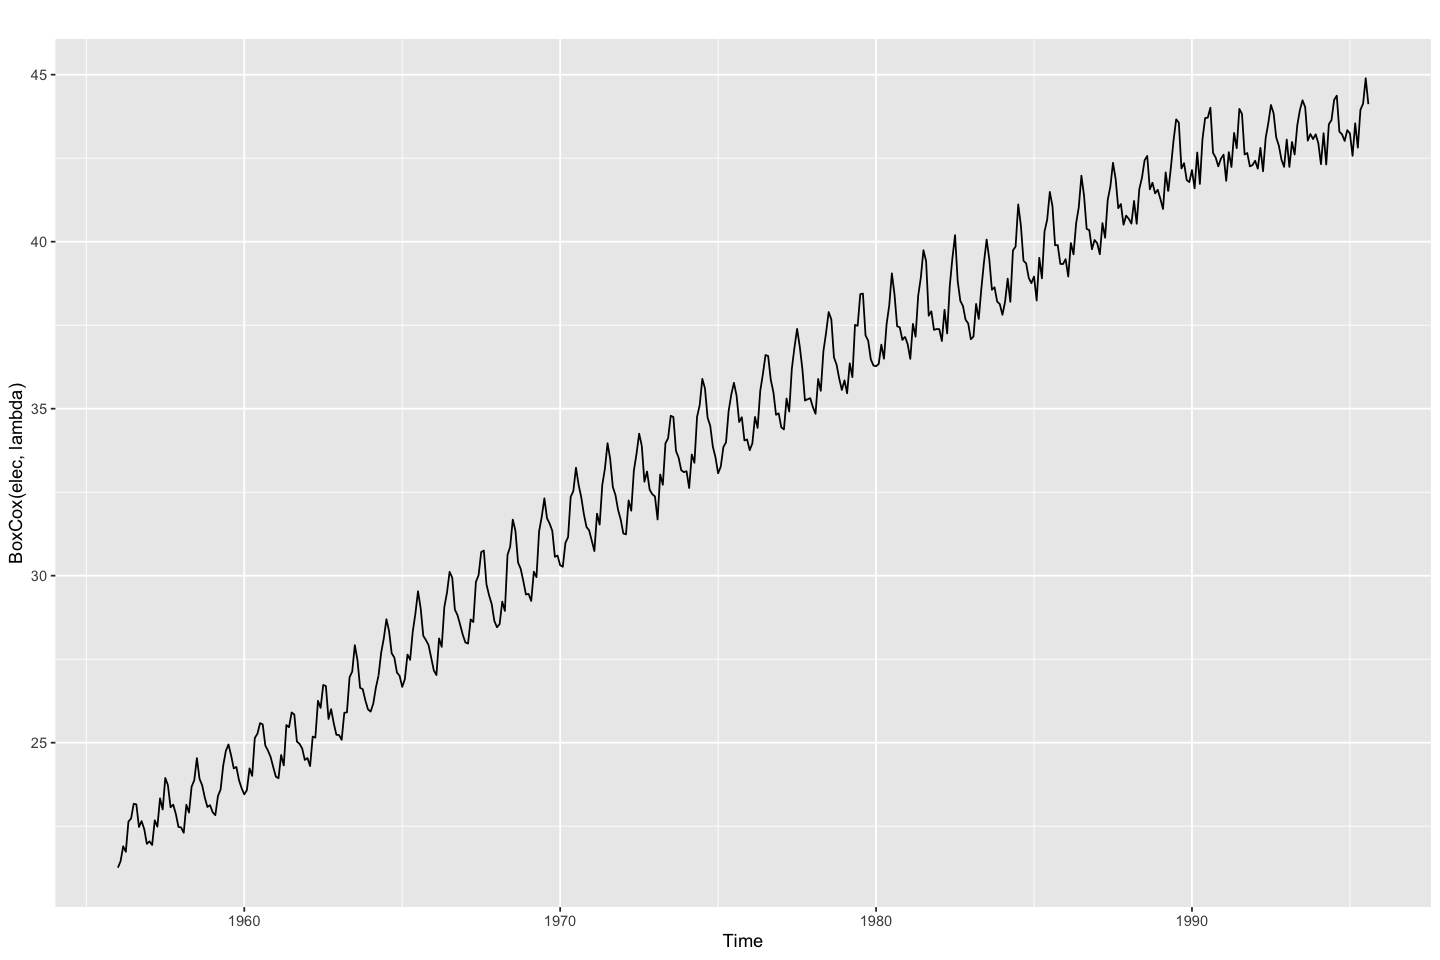

In [24]:
lambda <- BoxCox.lambda(elec)
autoplot(BoxCox(elec,lambda))

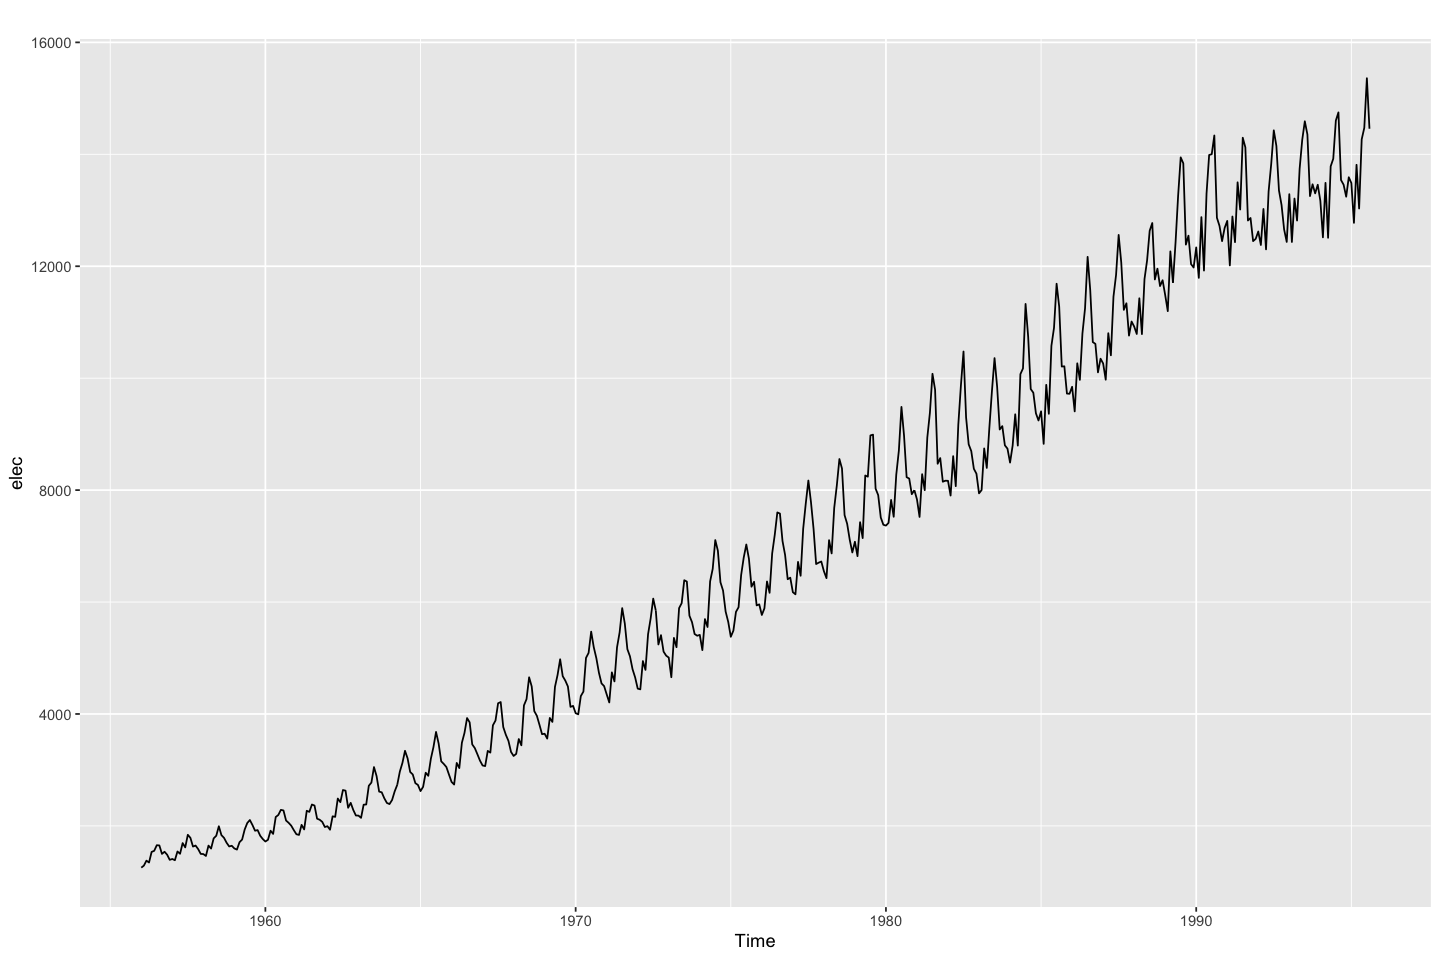

In [26]:
# Original Data
autoplot(elec)

A good value of λ is one which makes the size of the seasonal variation about the same across the whole series, as that makes the forecasting model simpler. 

### Calendar adjustments

Some variation seen in seasonal data may be due to simple calendar effects. In such cases, it is usually much easier to remove the variation before fitting a forecasting model. 

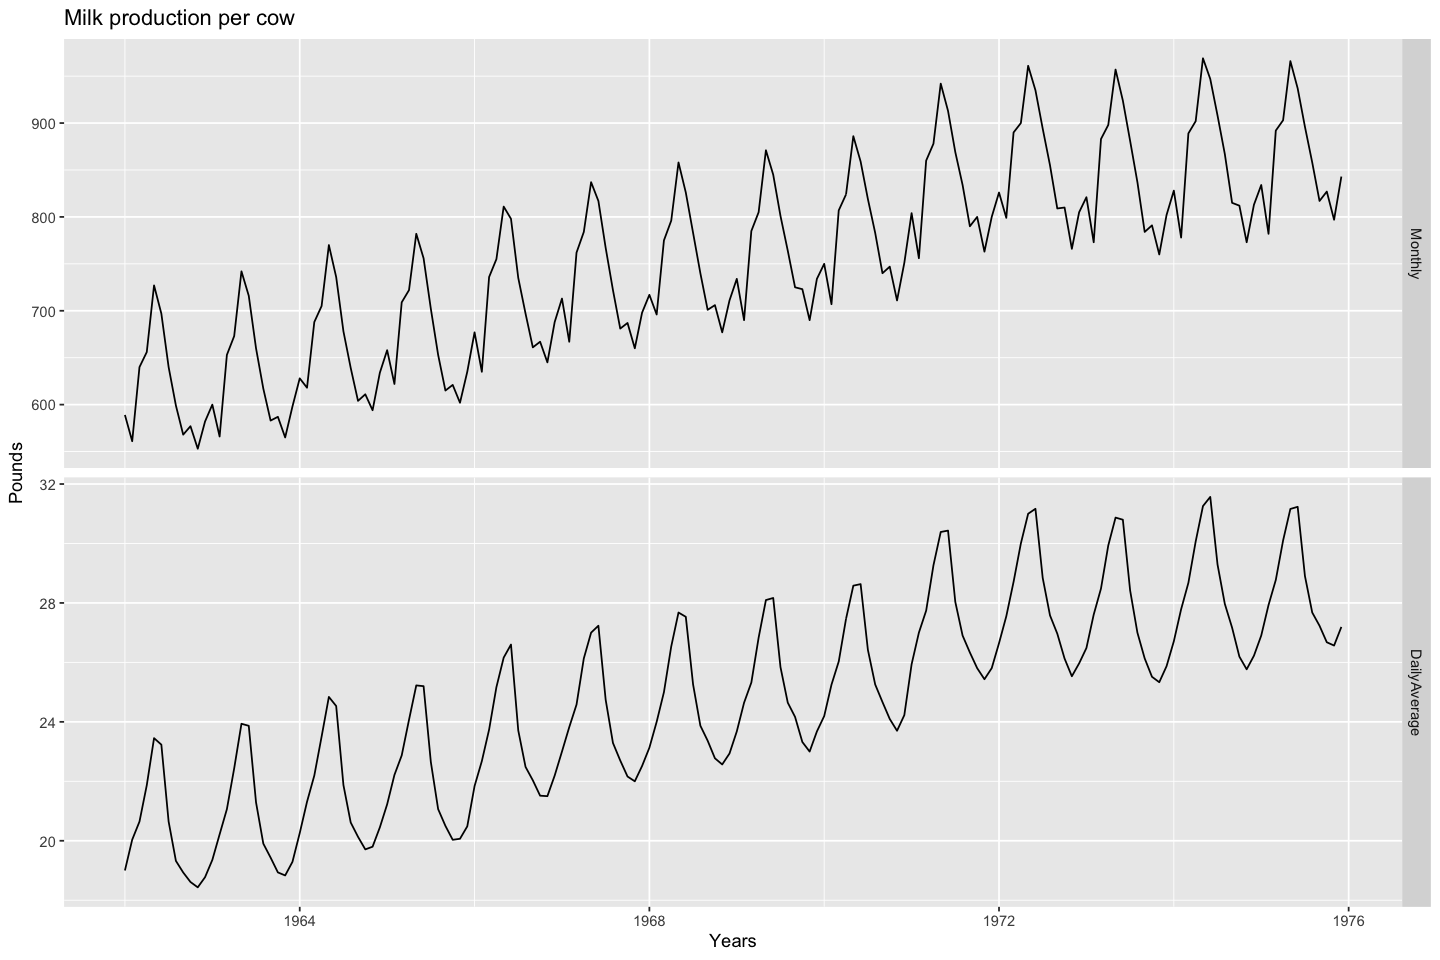

In [28]:
dframe <- cbind(Monthly = milk,
DailyAverage = milk/monthdays(milk)) 
autoplot(dframe, facet=TRUE) +
xlab("Years") + ylab("Pounds") +
ggtitle("Milk production per cow")

Studying monthly milk production on a farm, then there will be variation between the months simply because of the different numbers of days in each month in addition to seasonal variation across the year.

### Population Adjustments
Any data that are affected by population changes can be adjusted to give per-capita data. That is, consider the data per person (or per thousand people, or per million people) rather than the total. 

### Inflation Adjustments
Data that are affected by the value of money are best adjusted before modelling. For consumer goods, a common price index is the Consumer Price Index (or CPI).

## Portmanteau tests for autocorrelation

In [48]:
Box.test(res, lag = 10, fitdf = 0)


	Box-Pierce test

data:  res
X-squared = 10.655, df = 10, p-value = 0.385


In [49]:
Box.test(res, lag = 10, fitdf = 0, type = "Lj")


	Box-Ljung test

data:  res
X-squared = 11.088, df = 10, p-value = 0.3507


Note that here null hypothesis is H0: Series are **not** significantly 

Autocorrleated or the same H0: the records are **not** distinguishable from white noise.

We do not reject it! Remember Type 2 error (**Not reject Ho whereas it is wrong!**)